<a id='top'></a>
# <p style="font-family:roboto;color:#0a0a0b;font-size:42px;text-align:center;border-radius:60px 40px;">Nairobi Historical Weather Data Analysis(2013-2022)</p>


[**1. Introduction**](#1)

[**2. Data Loading and Inspection**](#2)

[**3. Attributes selection**](#3)

[**4. Data Cleaning**](#4)

[**5. Temperature Analysis**](#5)

[**6. Rainfall Analysis**](#6)

[**7. Wind Analysis**](#7)

[**8. Atmospheric Pressure Analysis**](#8)

[**9. Humidity Analysis**](#9)

[**10. Solar Energy Analysis**](#10)

[**11. Weather Condition Analysis**](#11)

[**12. Cloud Cover Analysis**](#12)

[**13. UV Index Analysis**](#13)

[**14. Correlation plot**](#14)

<a id="2"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">1. Introduction</p>

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
    
The objective of this project is to extract meaningful information from the data that could be useful for various application such as agriculture, renewable energy and disaster preparedness.</br>

The weather data used in this sproject was sourced from Visual Crossing weather data portal. It covers a period of 10 years and contains variables such as humidity, wind speed and direction and solar radiation - just to mention a few. The dataset is rich and provides an opportunity to understand the weather patterns in Nairobi.</br>

Later, I am going to build a regression model to perform prediction of soolar radiation.</br> 
</div>

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import windrose
import seaborn as sns

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.family'] = 'Times New Roman'

<a id="2"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">2. Data Loading and Inspection</p>

In [2]:
data = pd.concat(map(pd.read_csv,glob.glob('./Data'+'/*.csv'))) 
data.head(3)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Nairobi,2013-01-01,76.0,60.8,67.5,76.0,60.8,67.5,61.1,81.5,...,15.2,7,NaN,2013-01-01T06:30:31,2013-01-01T18:42:07,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"63739099999,HKJK,63741099999,HKNC,remote,HKNW,..."
1,Nairobi,2013-01-02,77.6,63.5,68.4,77.6,63.5,68.4,61.1,78.8,...,15.0,6,NaN,2013-01-02T06:31:00,2013-01-02T18:42:34,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"63739099999,HKJK,63741099999,HKNW,63740099999,..."
2,Nairobi,2013-01-03,73.4,61.5,67.3,73.4,61.5,67.3,57.1,71.5,...,20.7,8,NaN,2013-01-03T06:31:28,2013-01-03T18:43:01,0.67,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"63739099999,HKJK,63741099999,HKNC,HKNW,6374009..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3652 entries, 0 to 729
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3652 non-null   object 
 1   datetime          3652 non-null   object 
 2   tempmax           3652 non-null   float64
 3   tempmin           3652 non-null   float64
 4   temp              3652 non-null   float64
 5   feelslikemax      3652 non-null   float64
 6   feelslikemin      3652 non-null   float64
 7   feelslike         3652 non-null   float64
 8   dew               3652 non-null   float64
 9   humidity          3652 non-null   float64
 10  precip            3652 non-null   float64
 11  precipprob        3652 non-null   int64  
 12  precipcover       3652 non-null   float64
 13  preciptype        1329 non-null   object 
 14  snow              2186 non-null   float64
 15  snowdepth         2188 non-null   float64
 16  windgust          509 non-null    float64
 

<a id="3"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">3. Attributes Selection</p>

In [4]:
weather_data = pd.DataFrame({
                           'date': data['datetime'],             # Date
                           'pressure': data['sealevelpressure'], # Atmospheric pressure
                           'cloud_cover': data['cloudcover'],    # Cloud cover
                           'humidity': data['humidity'],         # Humidity
                           'rainfall': data['precip'],           # Rainfall
                           'temperature': data['temp'],          #Temperature
                           'wind_direction': data['winddir'],    # Wind Direction
                           'wind_speed': data['windspeed'],      # Wind Speed
                           'wind_gust': data['windgust'],        # Wind Gust
                           'condition': data['icon'],            # Weather Condition
                           'solar_radiation': data['solarradiation'], # Solar Energy
                           'uvindex': data['uvindex']                 # UV Index
                           })
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3652 entries, 0 to 729
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3652 non-null   object 
 1   pressure         851 non-null    float64
 2   cloud_cover      3652 non-null   float64
 3   humidity         3652 non-null   float64
 4   rainfall         3652 non-null   float64
 5   temperature      3652 non-null   float64
 6   wind_direction   3652 non-null   float64
 7   wind_speed       3652 non-null   float64
 8   wind_gust        509 non-null    float64
 9   condition        3652 non-null   object 
 10  solar_radiation  3652 non-null   float64
 11  uvindex          3652 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 370.9+ KB


<a id="4"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">4. Data Cleaning</p>

<a></a>
### <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Type and Unit Conversion</p>

In [5]:
weather_data['date'] = weather_data['date'].apply(lambda x: pd.to_datetime(x)) # convert date to datetime
weather_data['rainfall'] = weather_data['rainfall'].apply(lambda x: x/0.03937).astype(int) # inches to mm
weather_data['wind_speed'] = weather_data['wind_speed'].apply(lambda x: x* 0.44704).astype(int) # miles per hour to m/s
weather_data['wind_gust'] = weather_data['wind_gust'].apply(lambda x: x* 0.44704) # miles per hour to m/s
weather_data['temperature'] = weather_data['temperature'].apply(lambda x: (x - 32) * 5 / 9).astype(int) # Fahreinheit to celcius
weather_data['pressure'] = weather_data['pressure'].apply(lambda x: x/1000) # mbar to bar

In [6]:
weather_data.set_index('date',inplace=True) # reset index

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2013-01-01 to 2022-12-31
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pressure         851 non-null    float64
 1   cloud_cover      3652 non-null   float64
 2   humidity         3652 non-null   float64
 3   rainfall         3652 non-null   int32  
 4   temperature      3652 non-null   int32  
 5   wind_direction   3652 non-null   float64
 6   wind_speed       3652 non-null   int32  
 7   wind_gust        509 non-null    float64
 8   condition        3652 non-null   object 
 9   solar_radiation  3652 non-null   float64
 10  uvindex          3652 non-null   int64  
dtypes: float64(6), int32(3), int64(1), object(1)
memory usage: 299.6+ KB


In [8]:
weather_data.to_csv('nbi_weather_data.csv')

<a id="5"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">5. Temperature Analysis</p>

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Monthly Averages</p>**

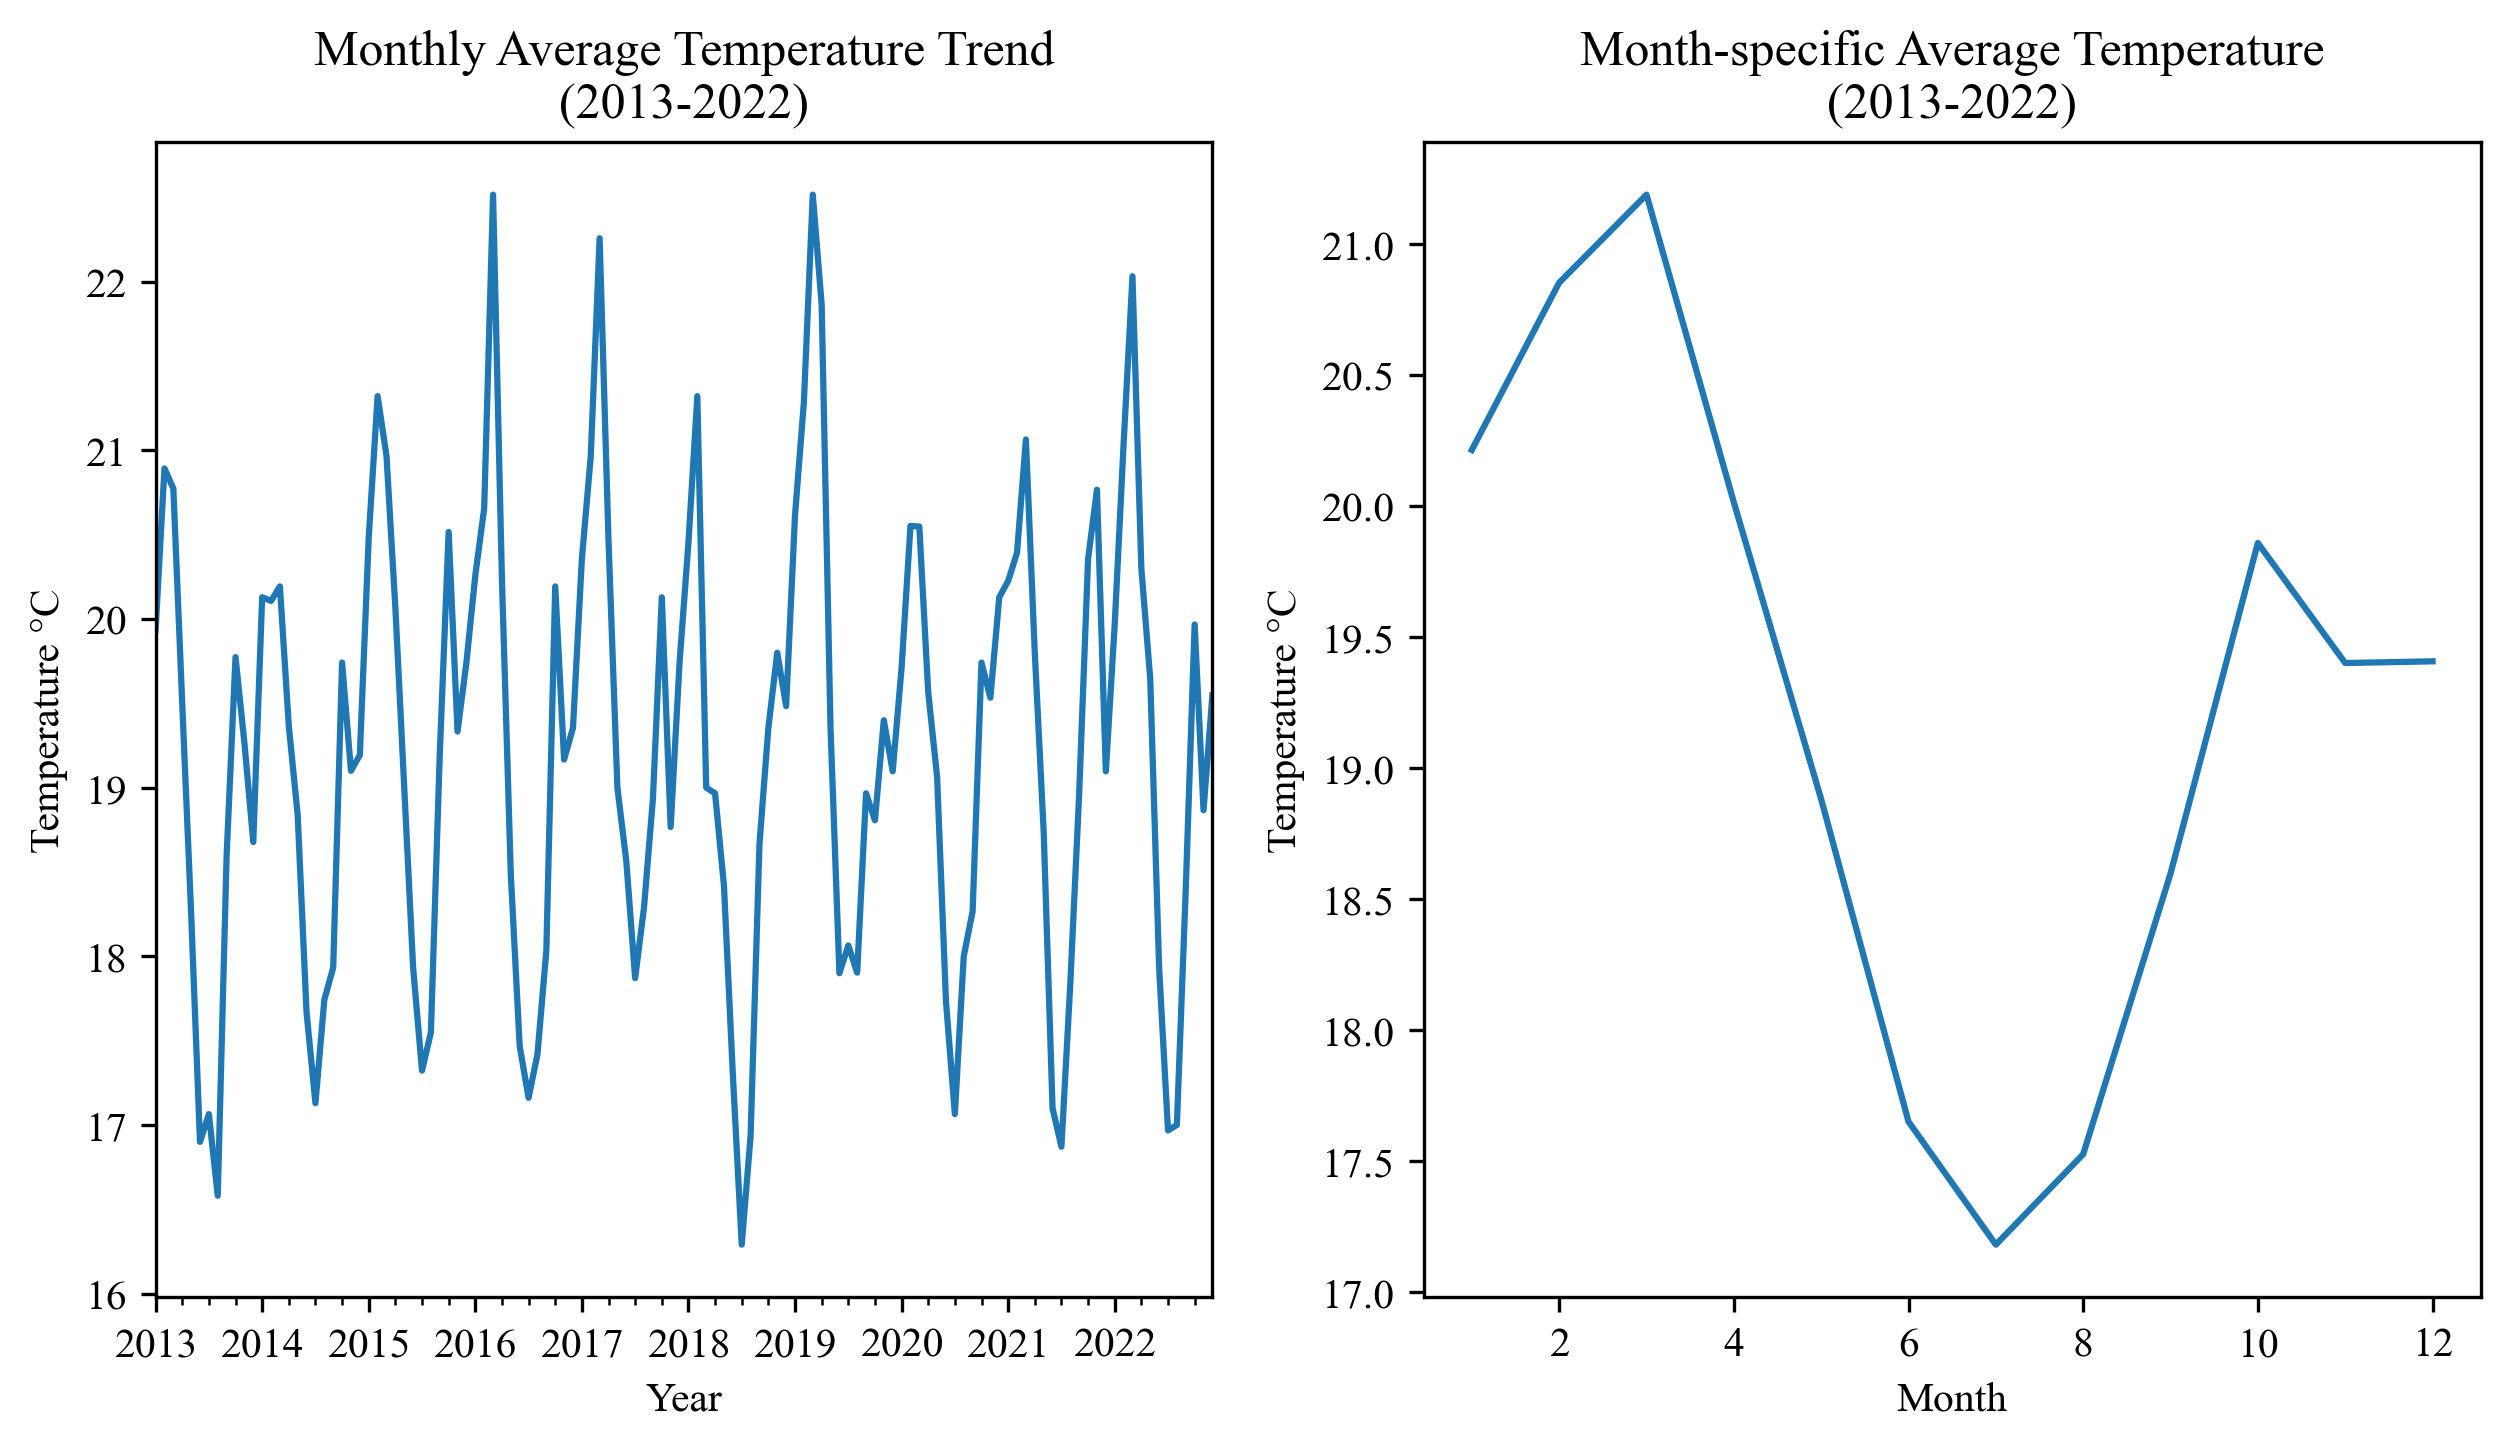

In [47]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
##cplot monthly average temperature trend for theperiod
weather_data['temperature'].resample('M').mean()\
.plot(
     ax = axes[0],
     kind = 'line',
     title = 'Monthly Average Temperature Trend\n(2013-2022)',
     ylabel = 'Temperature \u00B0C',
     xlabel = 'Year')
## plot month specific average temperature
weather_data.groupby(weather_data.index.month)['temperature'].mean()\
.plot(
     ax = axes[1],
     kind = 'line',
     title = 'Month-specific Average Temperature\n(2013-2022)',
     ylabel = 'Temperature \u00B0C',
     xlabel = 'Month')
plt.savefig('temperature.png')
plt.show()

In [10]:
print('Minimum Temp: ',weather_data['temperature'].min())
print('Maximum Temp: ',weather_data['temperature'].max())

Minimum Temp:  14
Maximum Temp:  24


**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Annual Averages</p>**

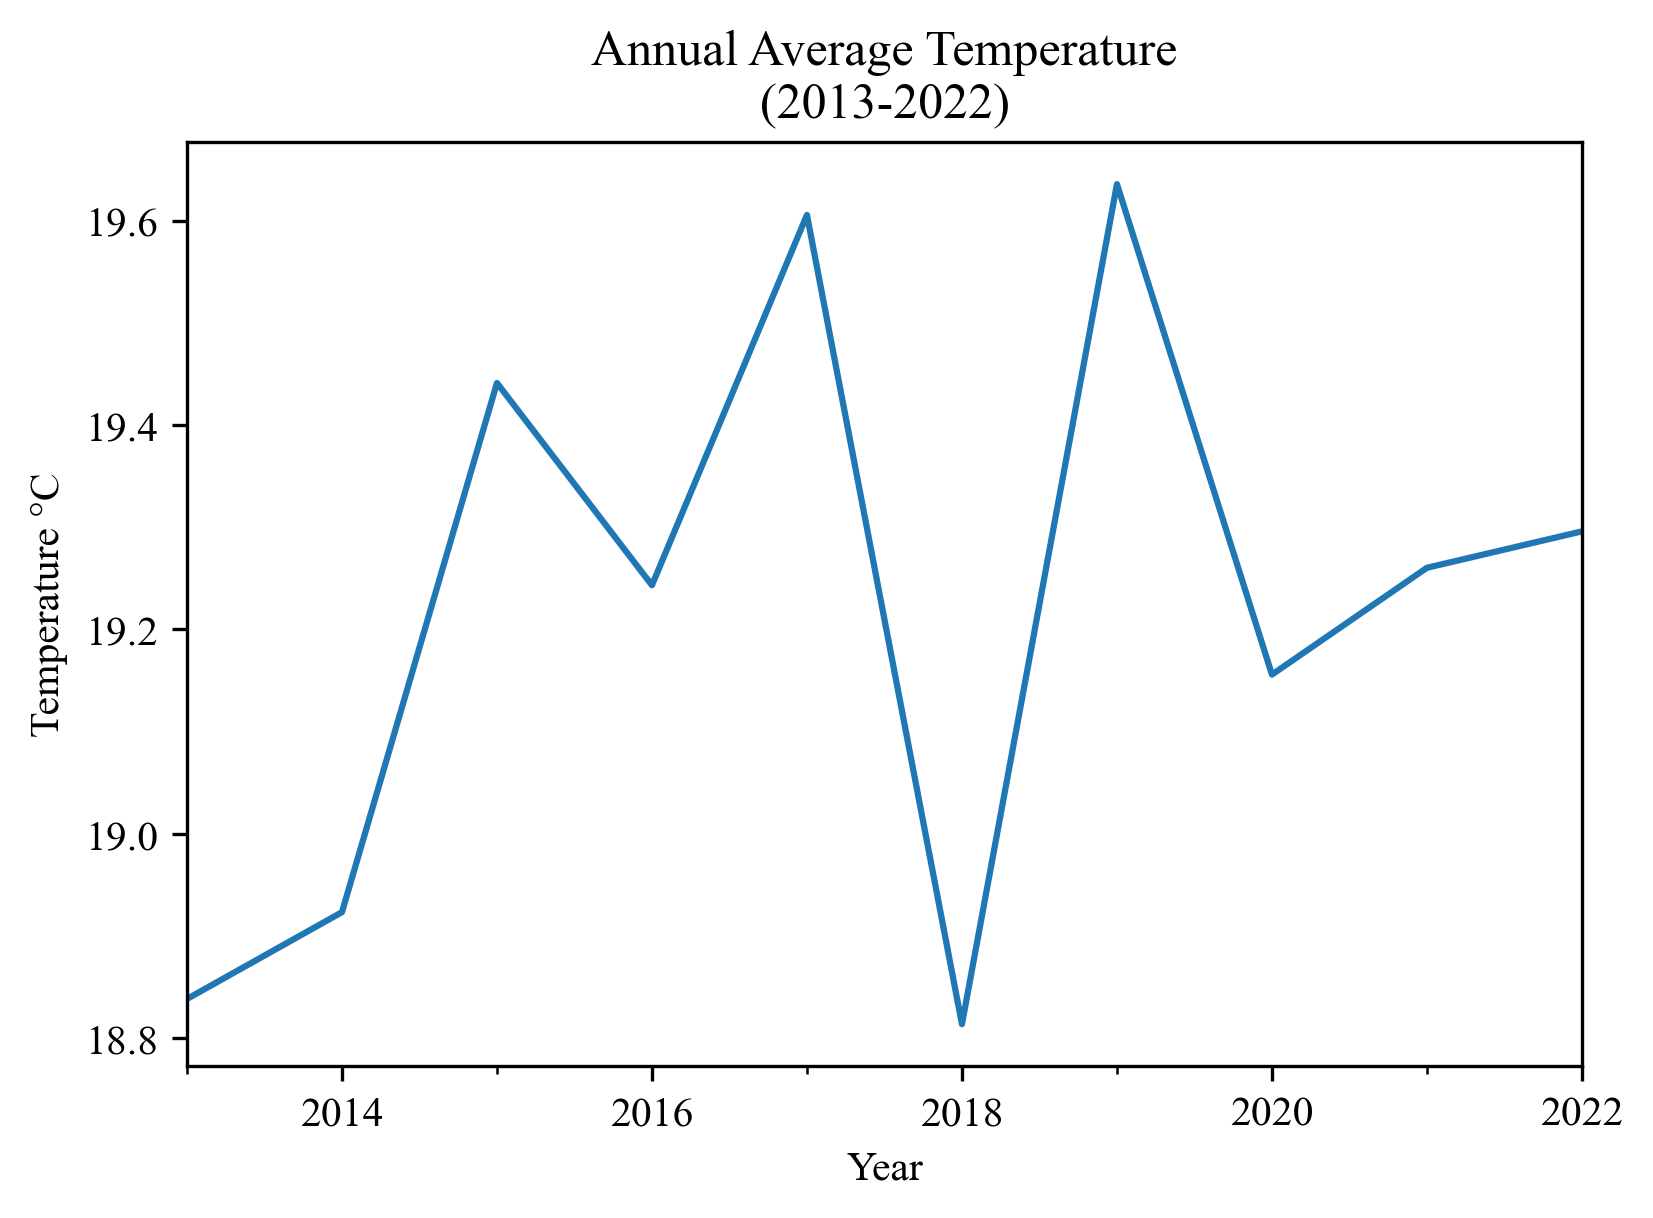

In [11]:
weather_data['temperature'].resample('Y').mean()\
.plot(kind = 'line',
     title = 'Annual Average Temperature\n(2013-2022)',
     ylabel = 'Temperature \u00B0C',
     xlabel = 'Year',
     figsize = (6,4))
plt.show()

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Temperature Distribution</p>**

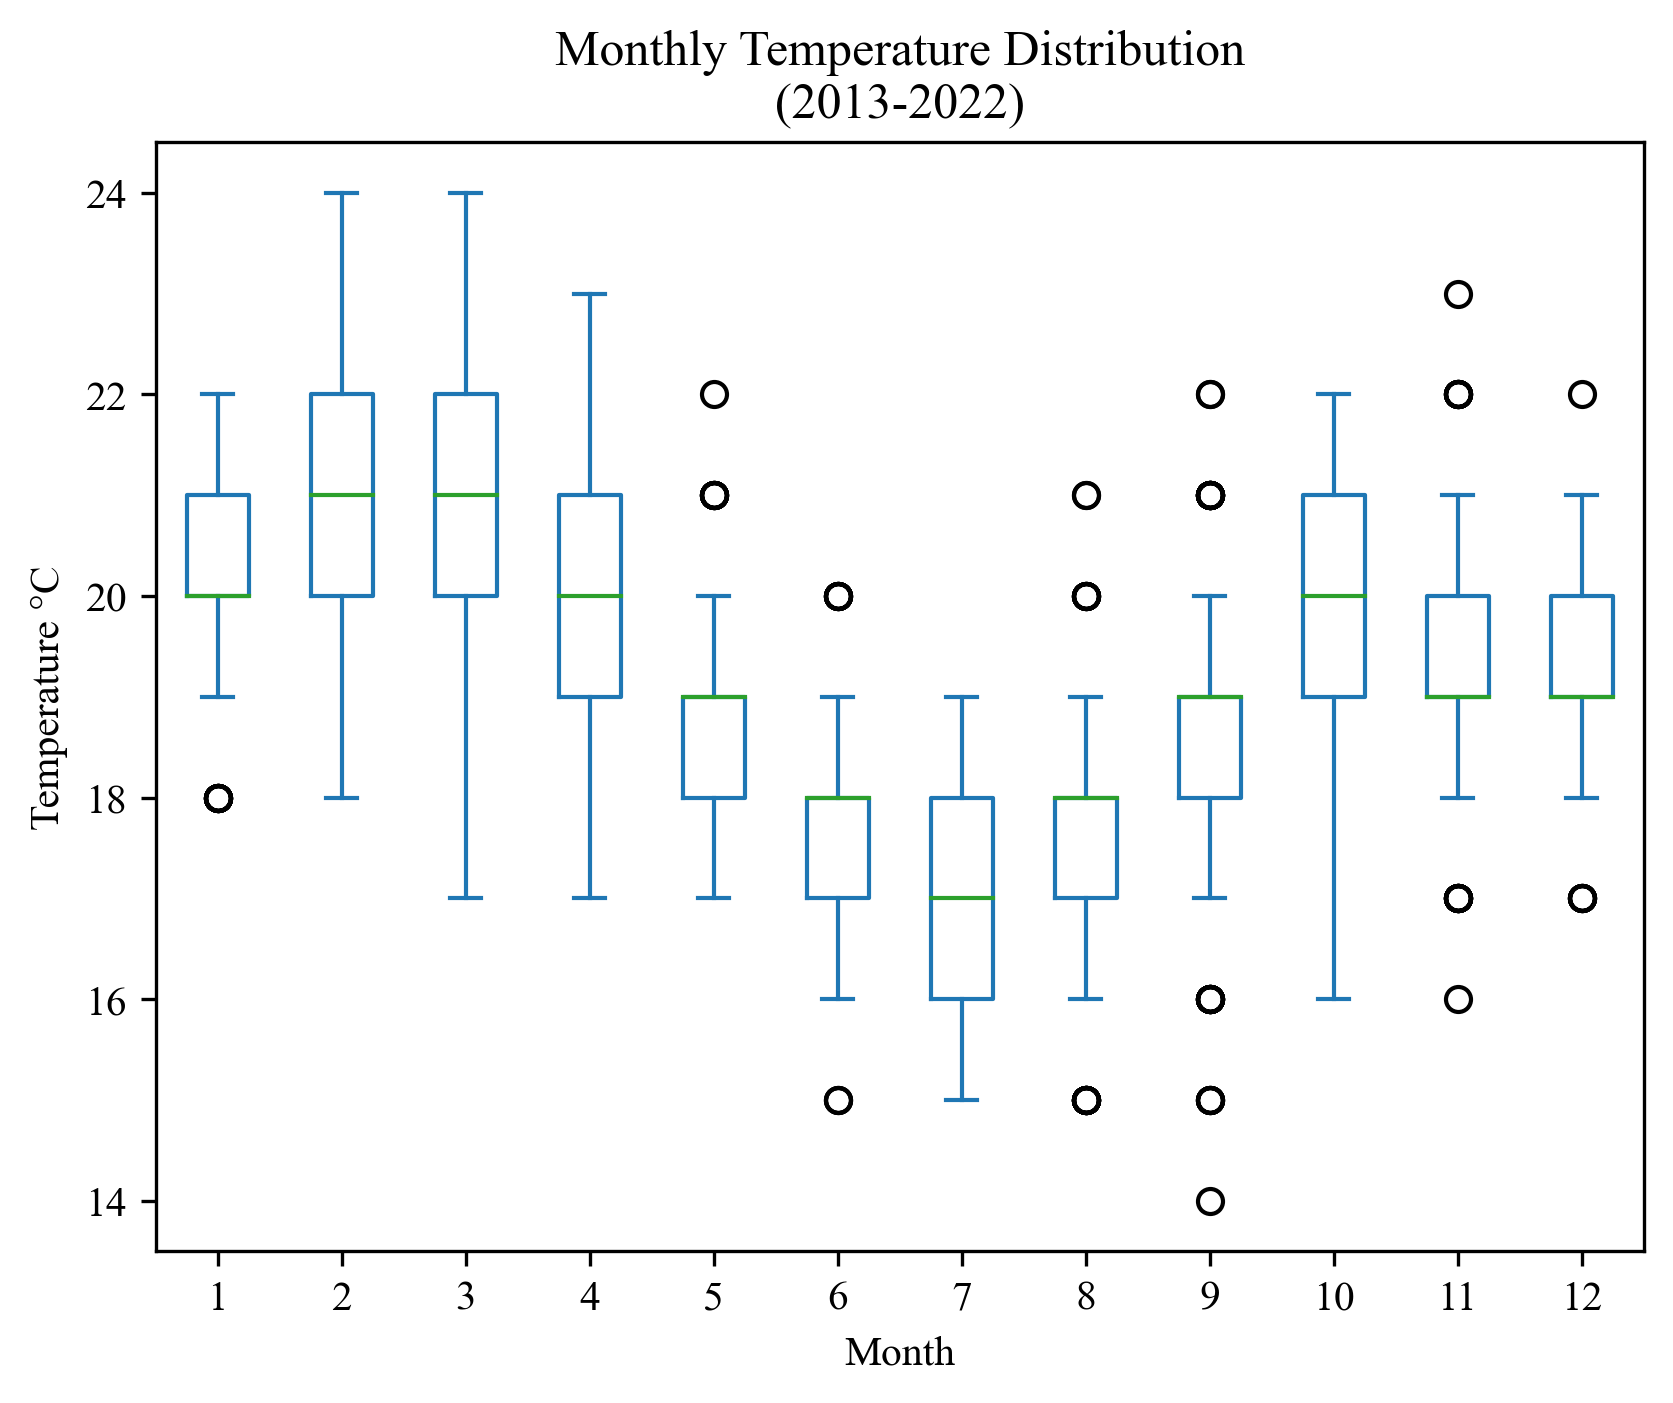

In [12]:
weather_data.pivot_table(index=weather_data.index,
                         columns=weather_data.index.month,
                         values='temperature')\
.plot.box()
plt.title('Monthly Temperature Distribution\n(2013-2022)')
plt.xlabel('Month')
plt.ylabel('Temperature \u00B0C')
plt.show()

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
The temperature trend is uniform between 16 degrees celcius and 22 degrees celcius, with extremes of upto 24 degrees celcius on the high and 14 degrees celcius on the low. the hottest months being January, February and March and the coldest months being June,July and August. Anomalously low temperatures wer also recorded in the hot month hot months of January as well the cold months. The hottest year was 2019 and the coldest year was 2018(there's no specific trend).
</div>

<a id="6"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">6. Rainfall Analysis</p>

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Total Monthly Rainfall </p>**

In [13]:
pd.DataFrame(weather_data.groupby(weather_data.index.month)['rainfall'].sum()).sort_values(by='rainfall',ascending = False).T

date,4,12,11,5,3,10,2,6,1,8,9,7
rainfall,1289,949,928,668,626,481,433,424,408,305,280,67


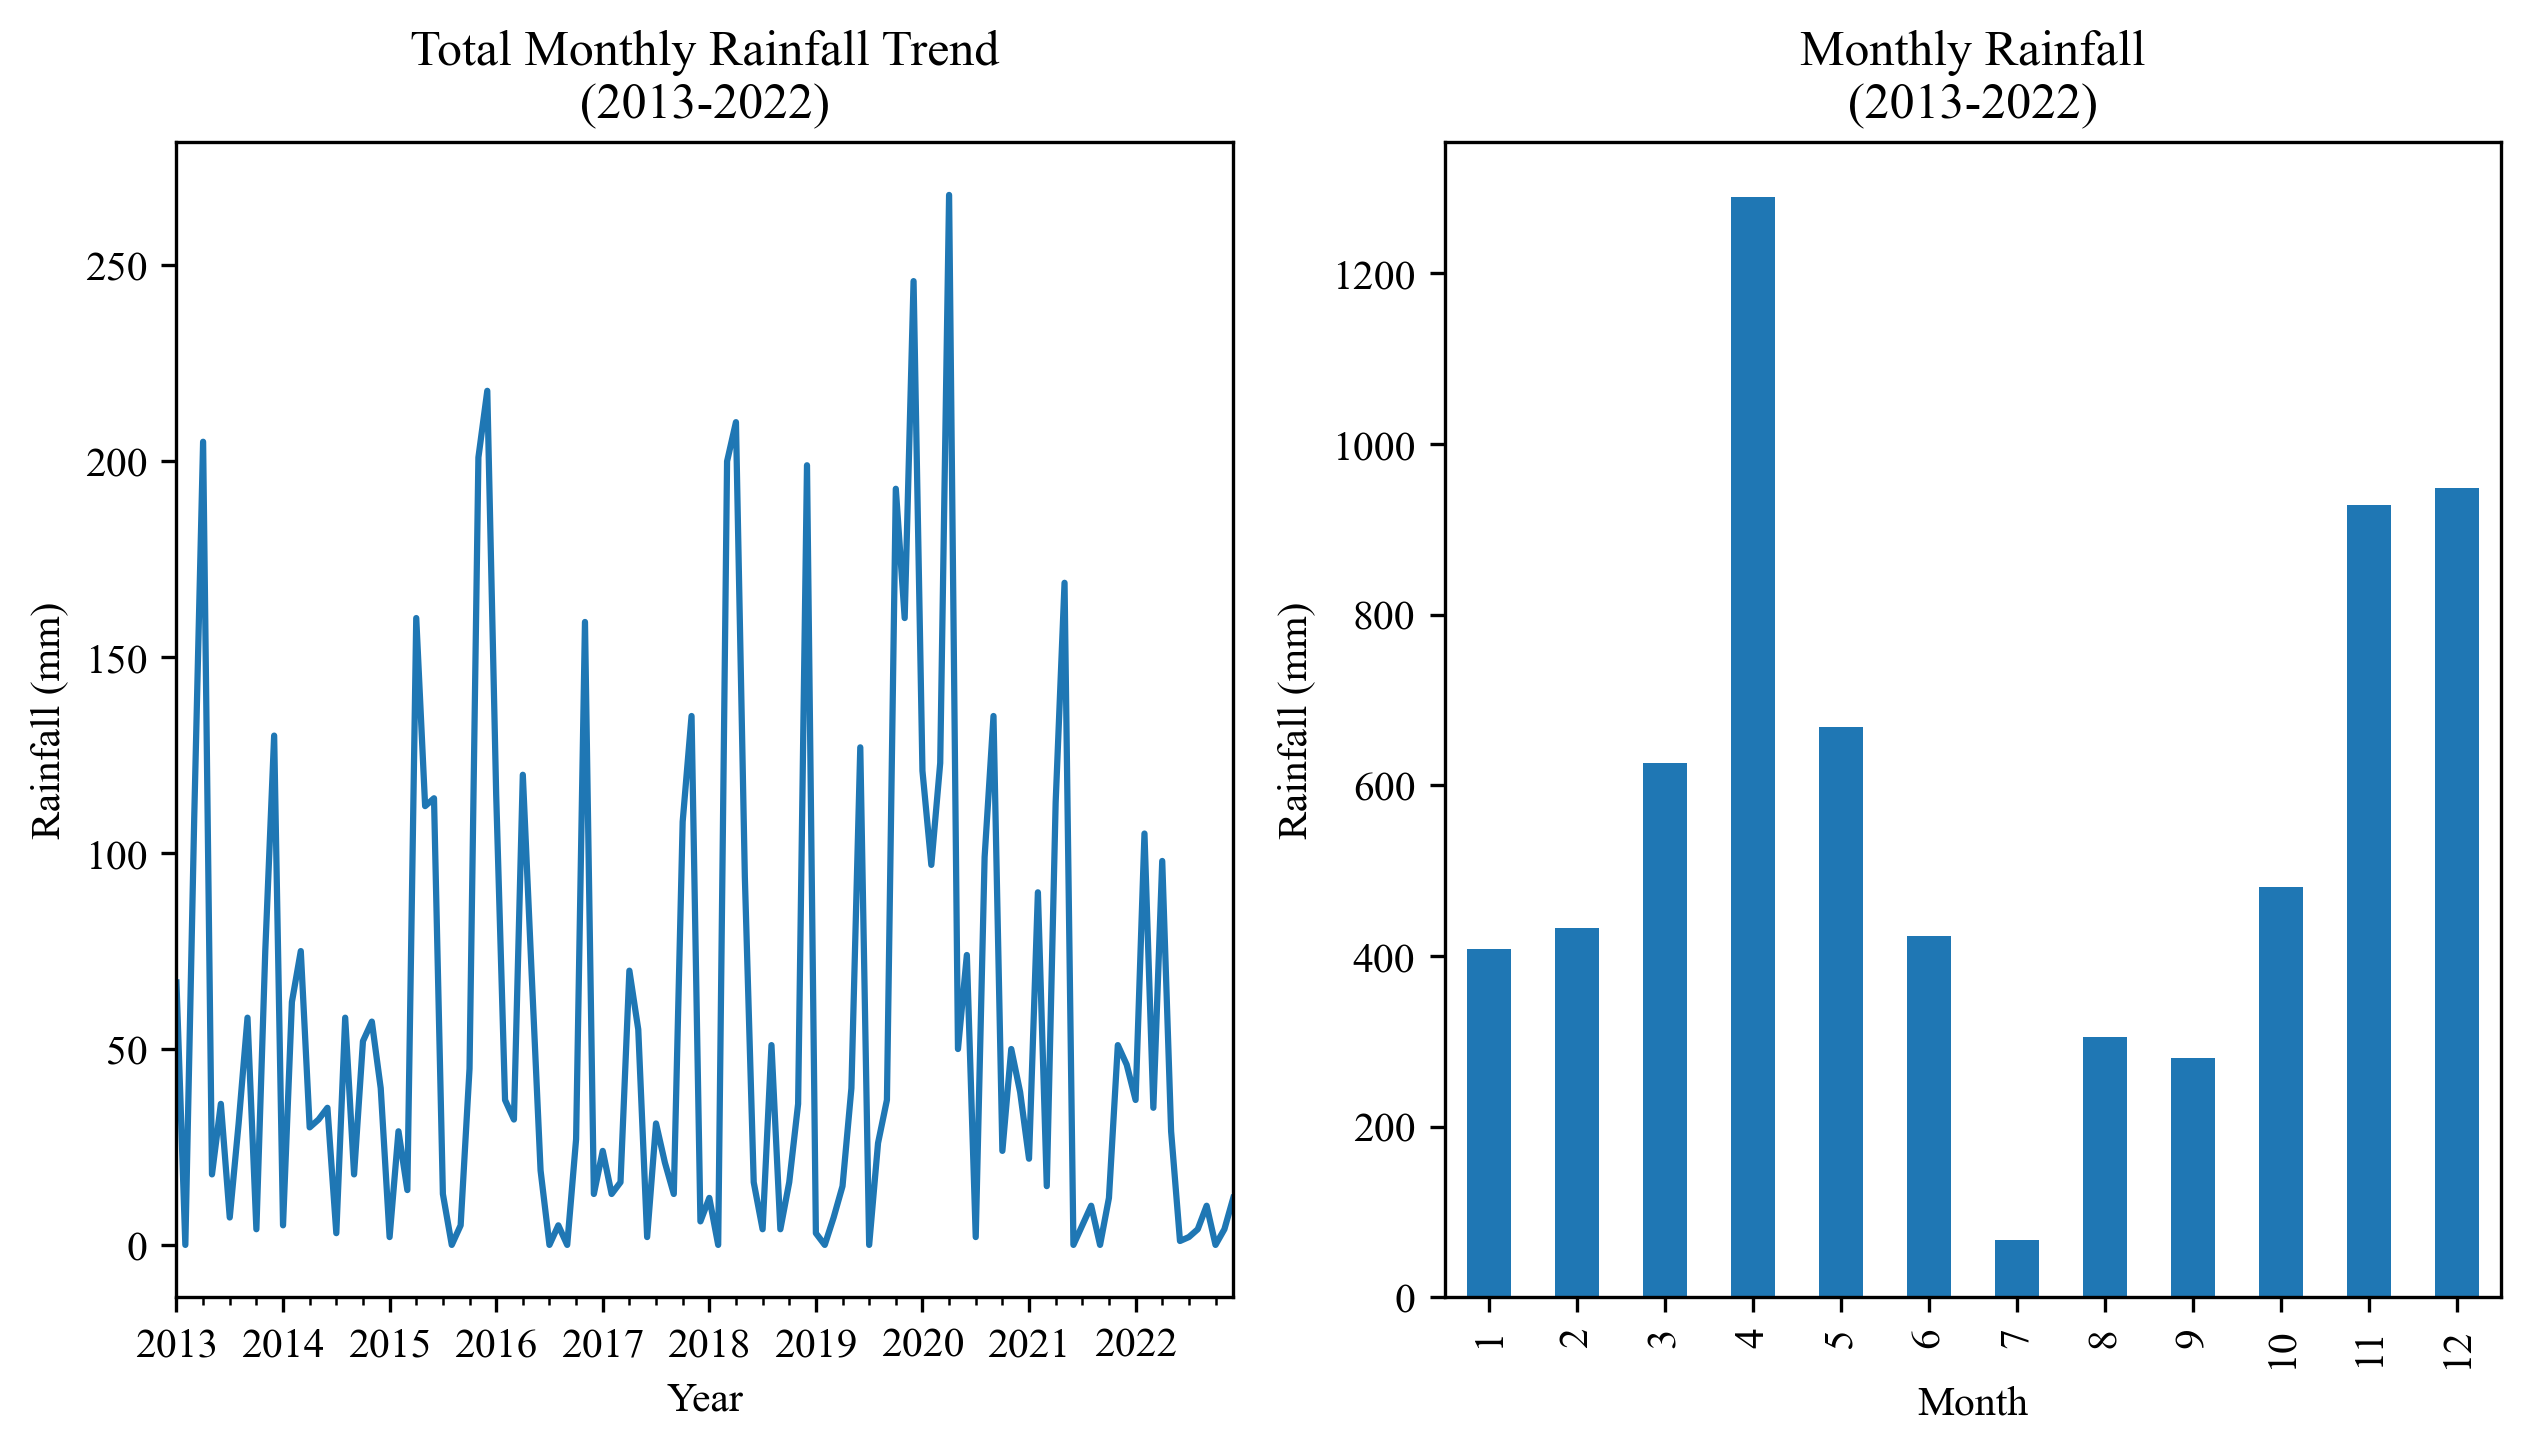

In [14]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
## plot monthly average temperature trend for theperiod
weather_data['rainfall'].resample('M').sum()\
.plot(
     ax = axes[0],
     kind = 'line',
     title = 'Total Monthly Rainfall Trend\n(2013-2022)',
     ylabel = 'Rainfall (mm)',
     xlabel = 'Year')

weather_data.groupby(weather_data.index.month)['rainfall'].sum()\
.plot(
     ax = axes[1],
     kind = 'bar',
     title = 'Monthly Rainfall\n(2013-2022)',
     ylabel = 'Rainfall (mm)',
     xlabel = 'Month')
plt.savefig('monthly_rainfall.png')
plt.show()

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Total Annual Rainfall</p>**

In [15]:
pd.DataFrame(weather_data.groupby(weather_data.index.year)['rainfall'].sum()).T

date,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
rainfall,740,467,913,596,494,842,854,1082,533,337


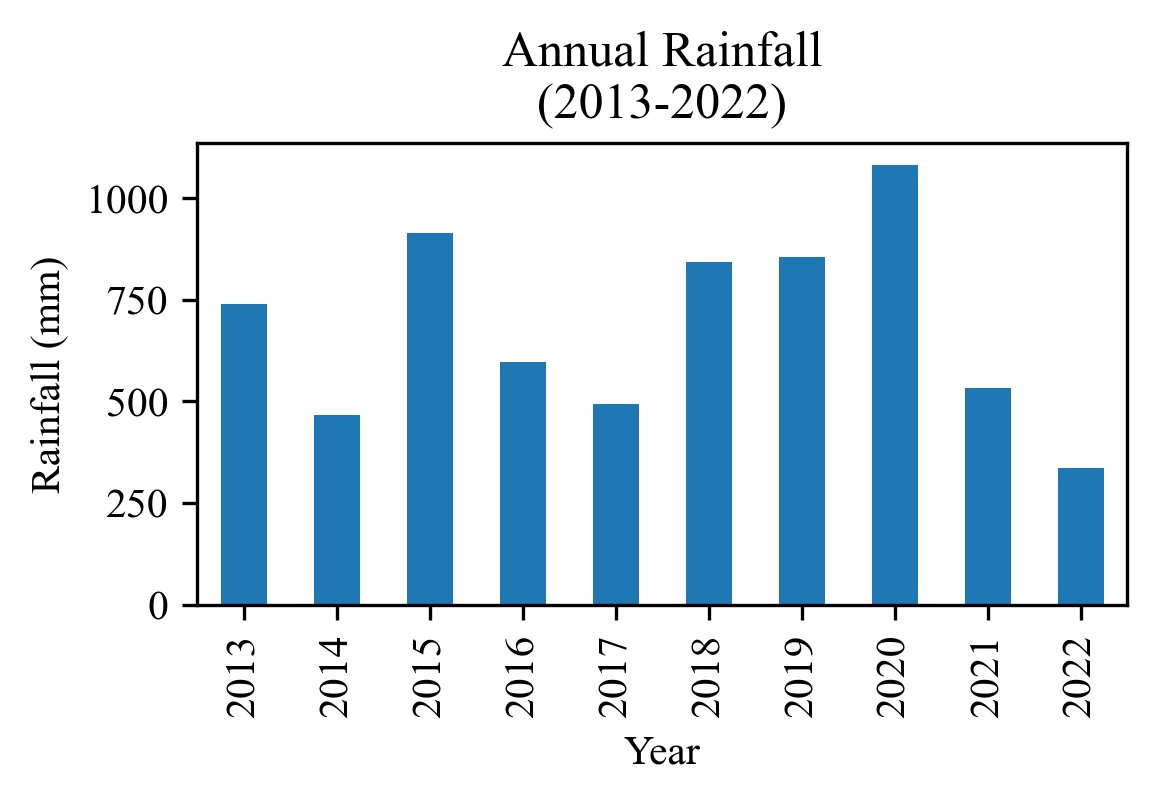

In [16]:
weather_data.groupby(weather_data.index.year)['rainfall'].sum()\
.plot(kind = 'bar',
     title = 'Annual Rainfall\n(2013-2022)',
     ylabel = 'Rainfall (mm)',
     xlabel = 'Year',
     figsize = (4,2))
plt.savefig('annual_rainfall.png')
plt.show()

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Rainfall Frequency</p>**

In [17]:
daily_rainfall = weather_data['rainfall'].resample('D').sum()
rainy_days = daily_rainfall.resample('M').apply(lambda x: (x > 0).sum())
monthly_rainfall = weather_data['rainfall'].resample('M').sum()

In [18]:
#top 5 months with the longest rainy  days
num_of_rainy_days = pd.DataFrame(rainy_days)
num_of_rainy_days.sort_values(by='rainfall',ascending= False).head().nlargest(5,'rainfall')

,rainfall
date,
2015-11-30,18
2019-10-31,16
2016-04-30,16
2013-04-30,15
2018-03-31,15


In [19]:
#Top 5 rainfall ammounts 
amount_of_rainfall = pd.DataFrame(monthly_rainfall)
amount_of_rainfall.sort_values(by='rainfall',ascending= False).head()

,rainfall
date,
2020-04-30,268
2019-12-31,246
2015-12-31,218
2018-04-30,210
2013-04-30,205


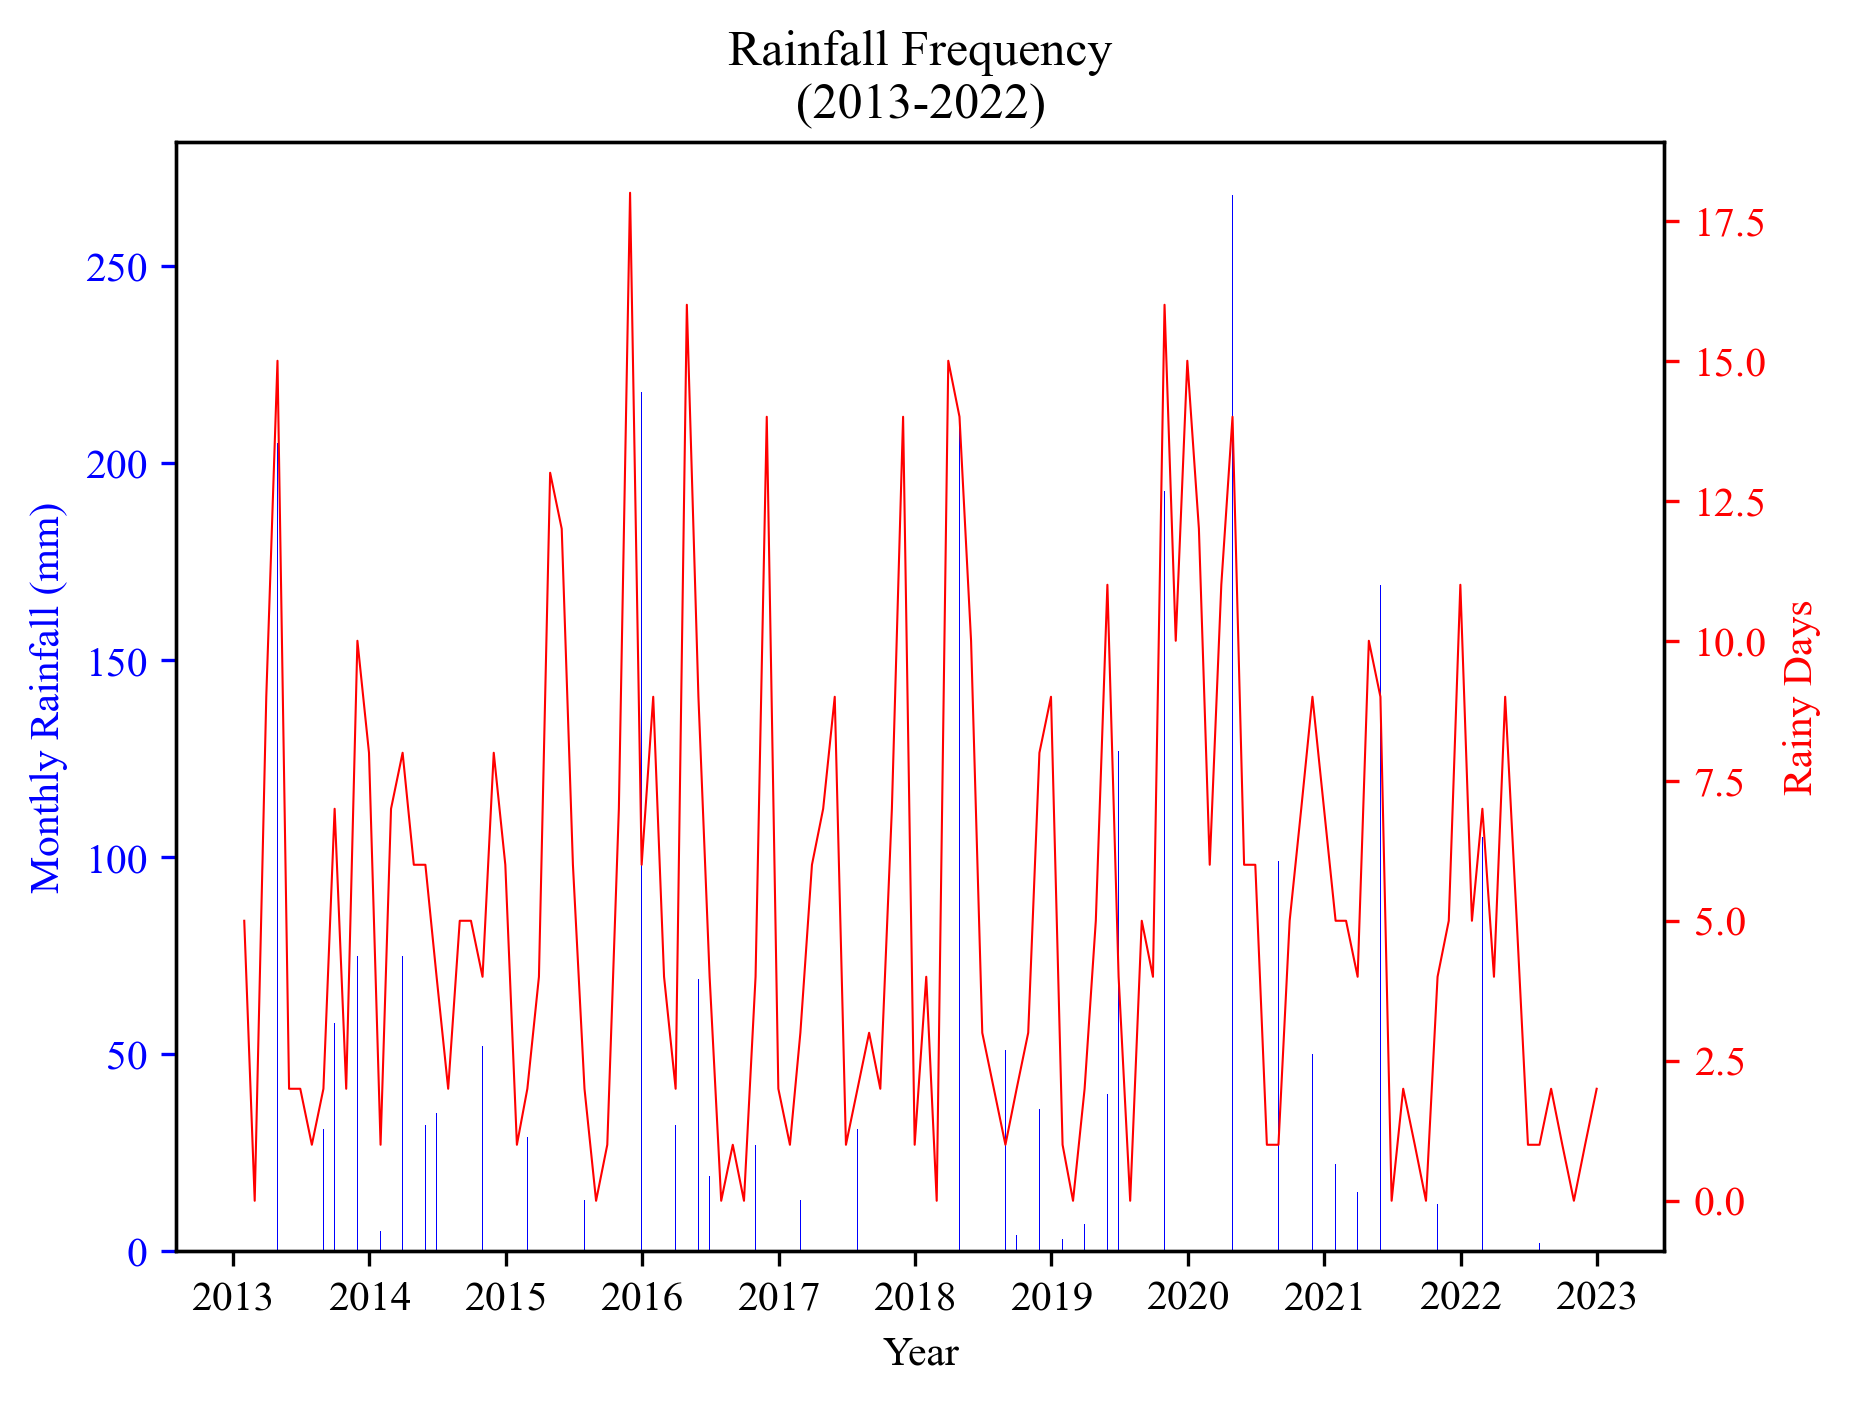

In [20]:
fig, ax1 = plt.subplots()
## plot bars for rainfall amount
ax1.bar(monthly_rainfall.index, monthly_rainfall.values, color='b')
ax1.set_ylabel('Monthly Rainfall (mm)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xlabel('Year')

## plot a line for the number of days that it rained
ax2 = ax1.twinx()
ax2.plot(rainy_days.index, rainy_days.values, color='r', lw=0.5)
ax2.set_ylabel('Rainy Days', color='r')
ax2.tick_params('y', colors='r')

plt.title('Rainfall Frequency\n(2013-2022)')
plt.savefig('rainfall_frequency.png')
plt.show()

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
There's no notable trend in the annual rainfall amount, some years receive more rainfall than others, where 2020 recorded the highest rainfall of 1002mm and 2022 recording the lowest of 337mm. throughout the year, rainfall is distributed unevenly withwith the majority of rain occuring during the long rain seasons of March to May and short rain months of November and December. It will be good to note that the month of November 2015 recorded the most number of rainy days(18) and the month of April 2020 recorded the highest rainfall amount(268mm)
</div>

<a id="7"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">7. Wind Analysis</p>

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Wind Gust</p>**

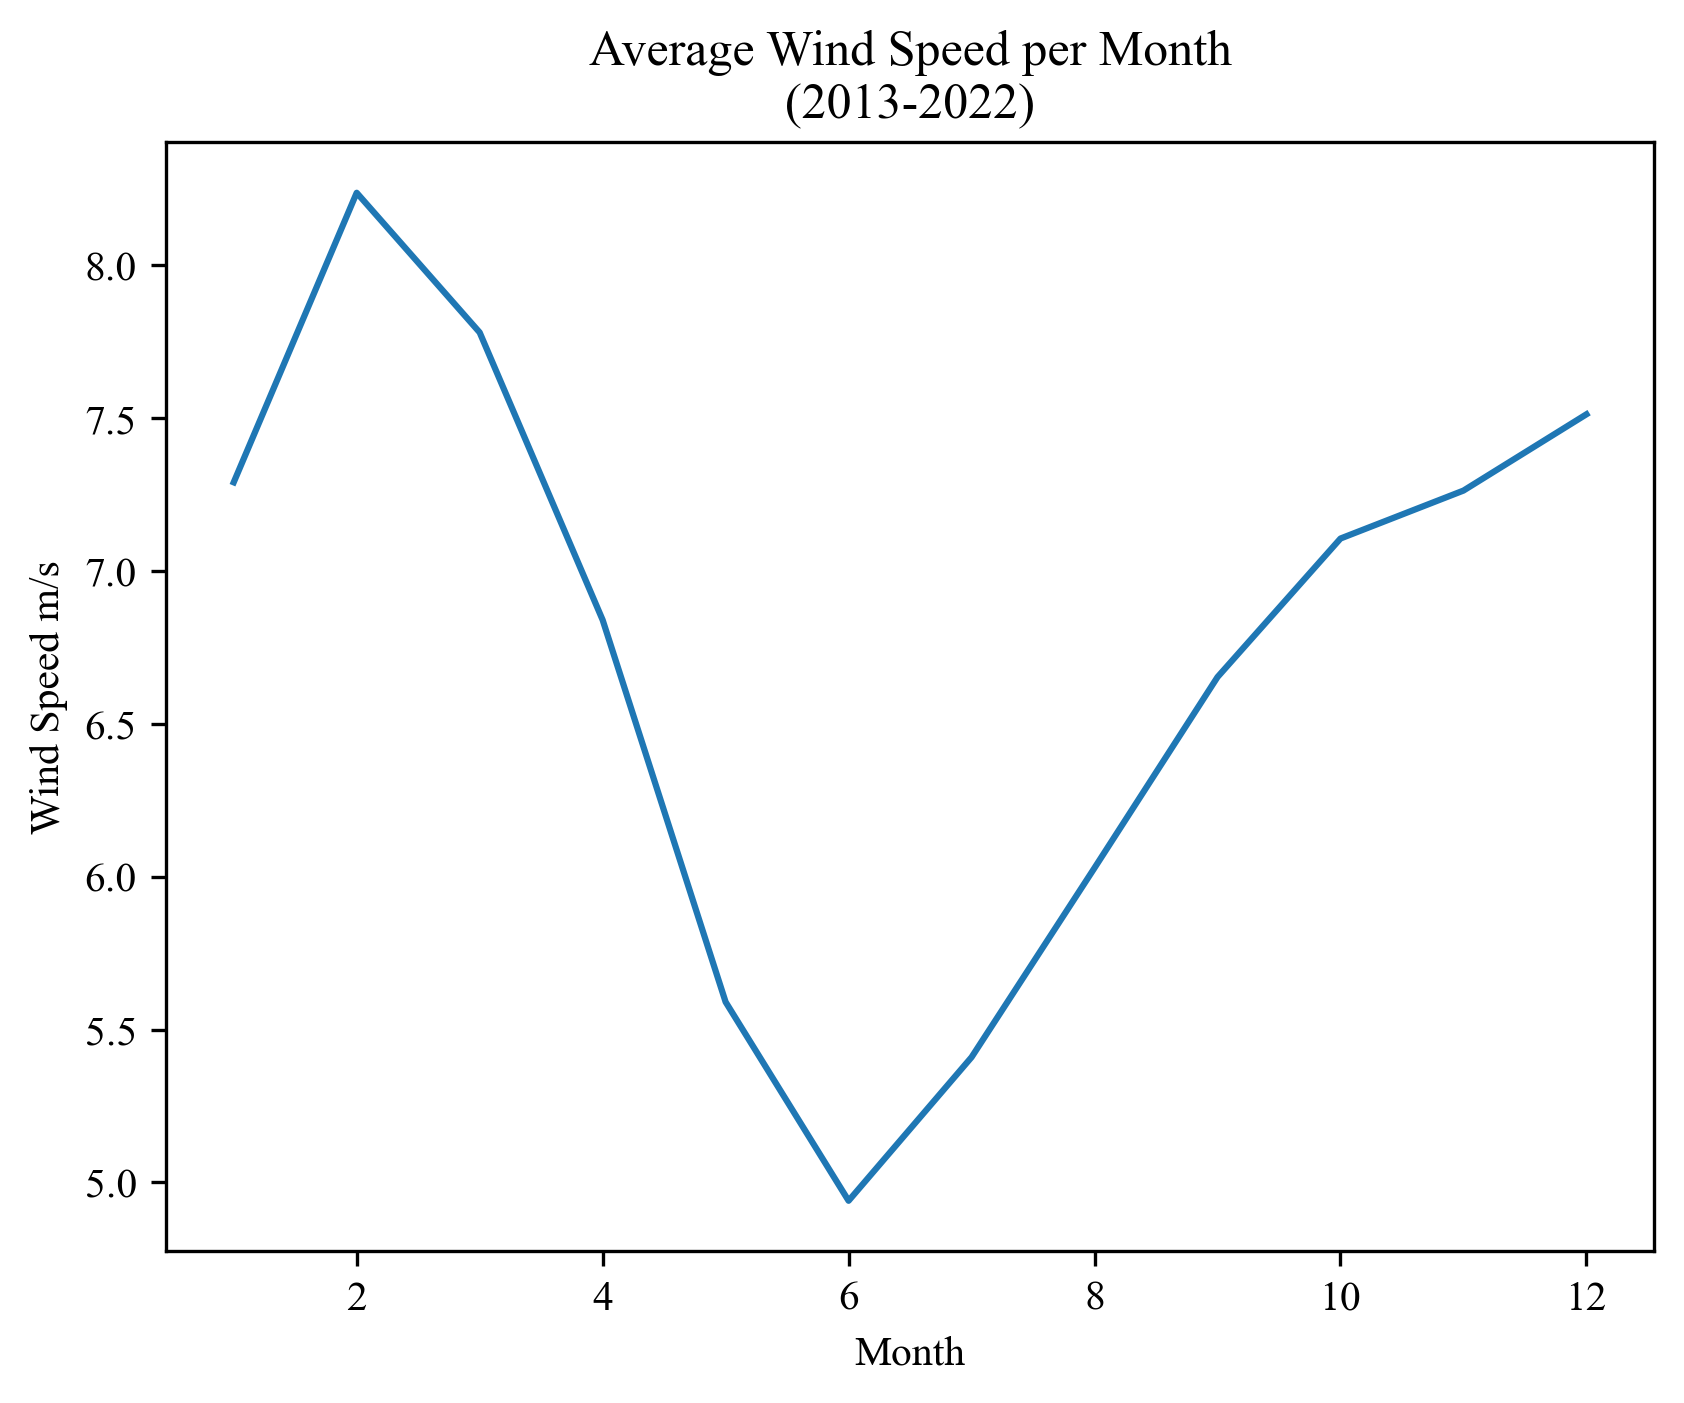

date,3,12,2,1,4,11,10,9,5,6,7,8
wind_gust,11.381159,10.98301,10.922677,10.59629,10.261697,10.213305,8.977187,7.714166,7.543481,7.402982,7.314184,7.263384


In [46]:
## plot month specific average temperature
weather_data.groupby(weather_data.index.month)['wind_speed'].mean()\
.plot(
     kind = 'line',
     title = 'Average Wind Speed per Month\n(2013-2022)',
     ylabel = 'Wind Speed m/s',
     xlabel = 'Month')
plt.savefig('month_specific_wind.png')
plt.show()
pd.DataFrame(weather_data.groupby(weather_data.index.month)['wind_gust'].mean()).sort_values(by='wind_gust',ascending = False).T

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Wind Directions</p>**

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Scatter Plot</p>**

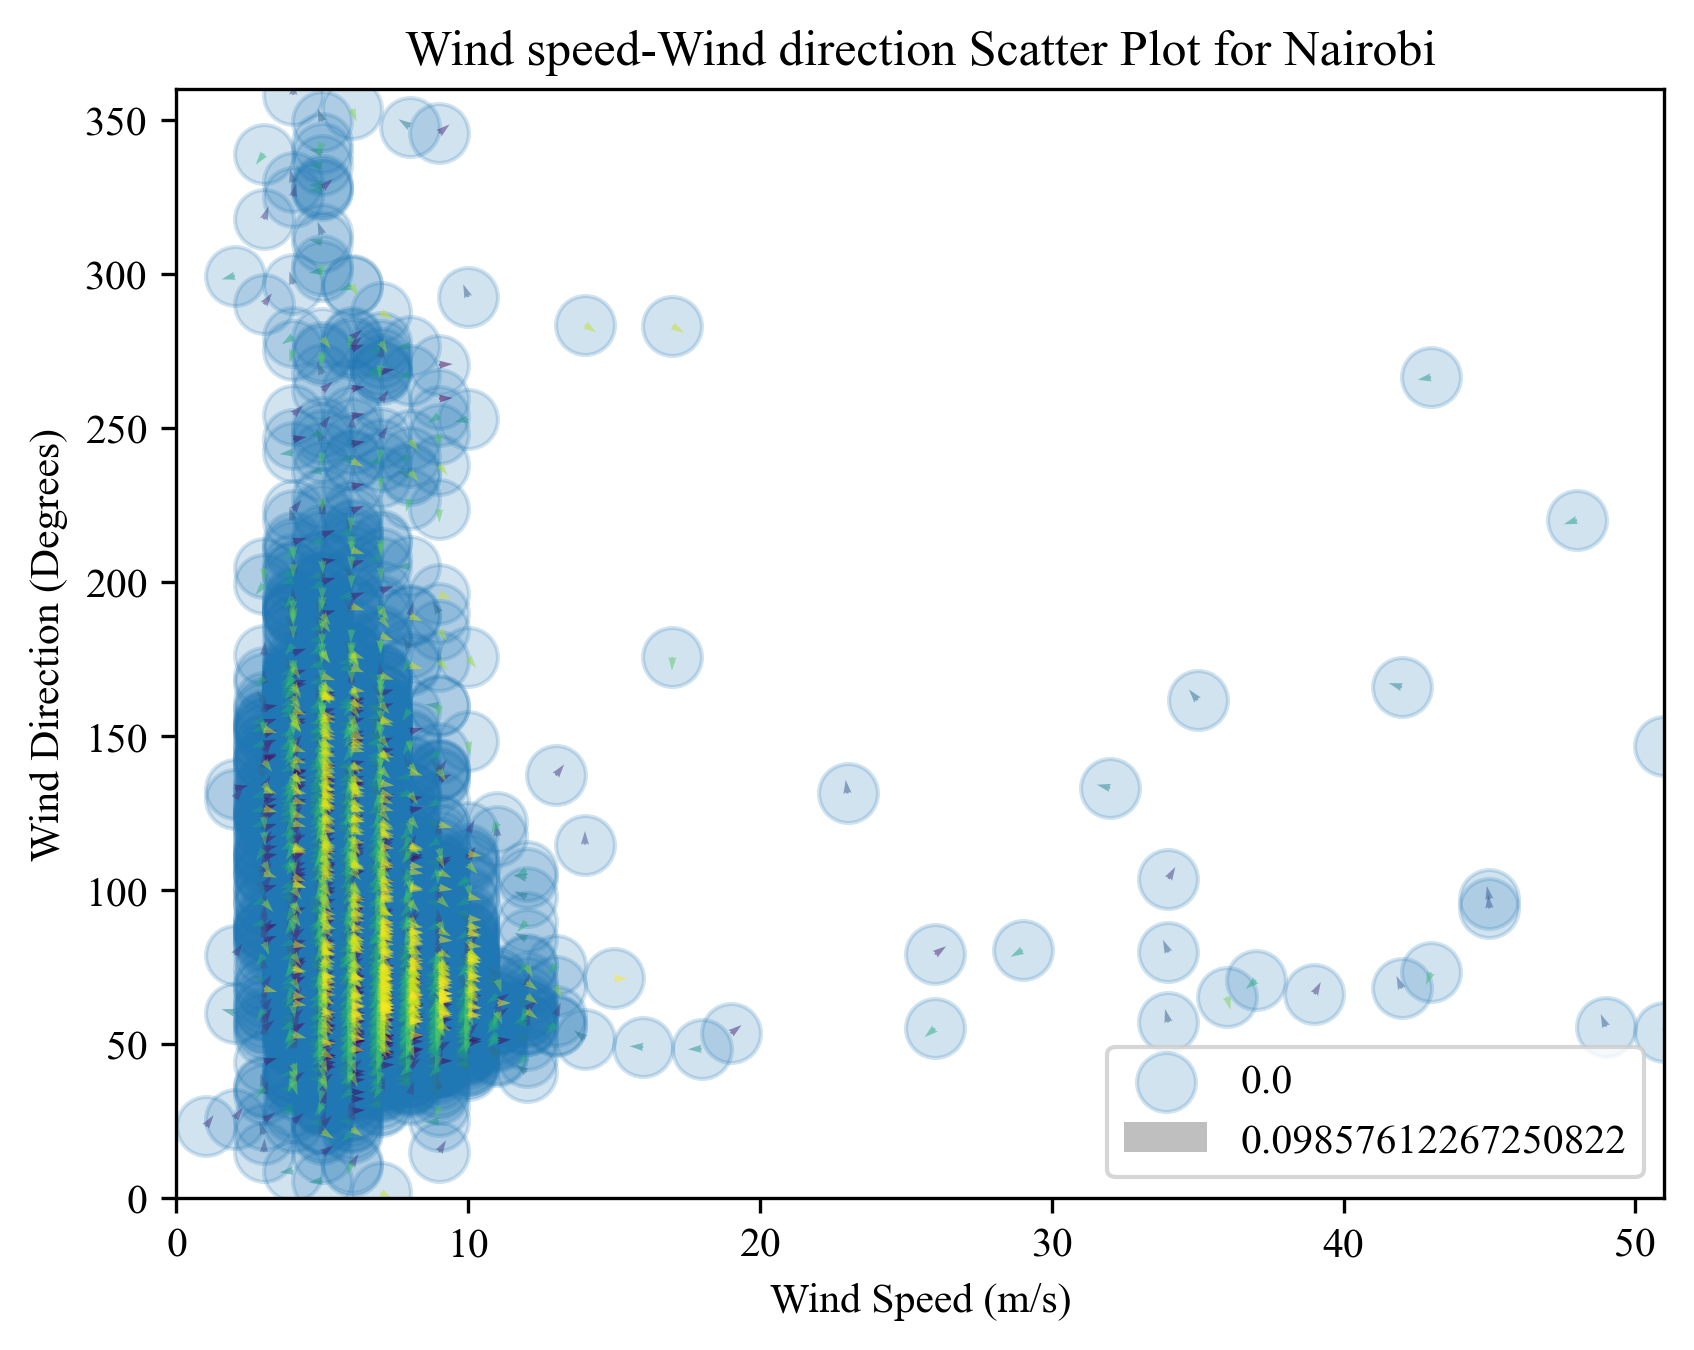

In [22]:
## Scatter plot for speed vs degrees
plt.scatter(weather_data['wind_speed'], weather_data['wind_direction'], alpha=0.2, s=200)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction (Degrees)')
plt.xlim([0, max(weather_data['wind_speed'])])
plt.ylim([0, 360])

## Preparing the legend
angles = np.linspace(0, 360, 3652, endpoint=False)
plt.quiver(weather_data['wind_speed'], weather_data['wind_direction'], np.cos(np.radians(angles)), 
           np.sin(np.radians(angles)), angles, pivot='tail', alpha=0.5, color='gray')
plt.legend(angles, loc='lower right')
plt.title('Wind speed-Wind direction Scatter Plot for Nairobi')
plt.show()

**<p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:left;border-radius:60px 40px;">Windrose chart</p>**

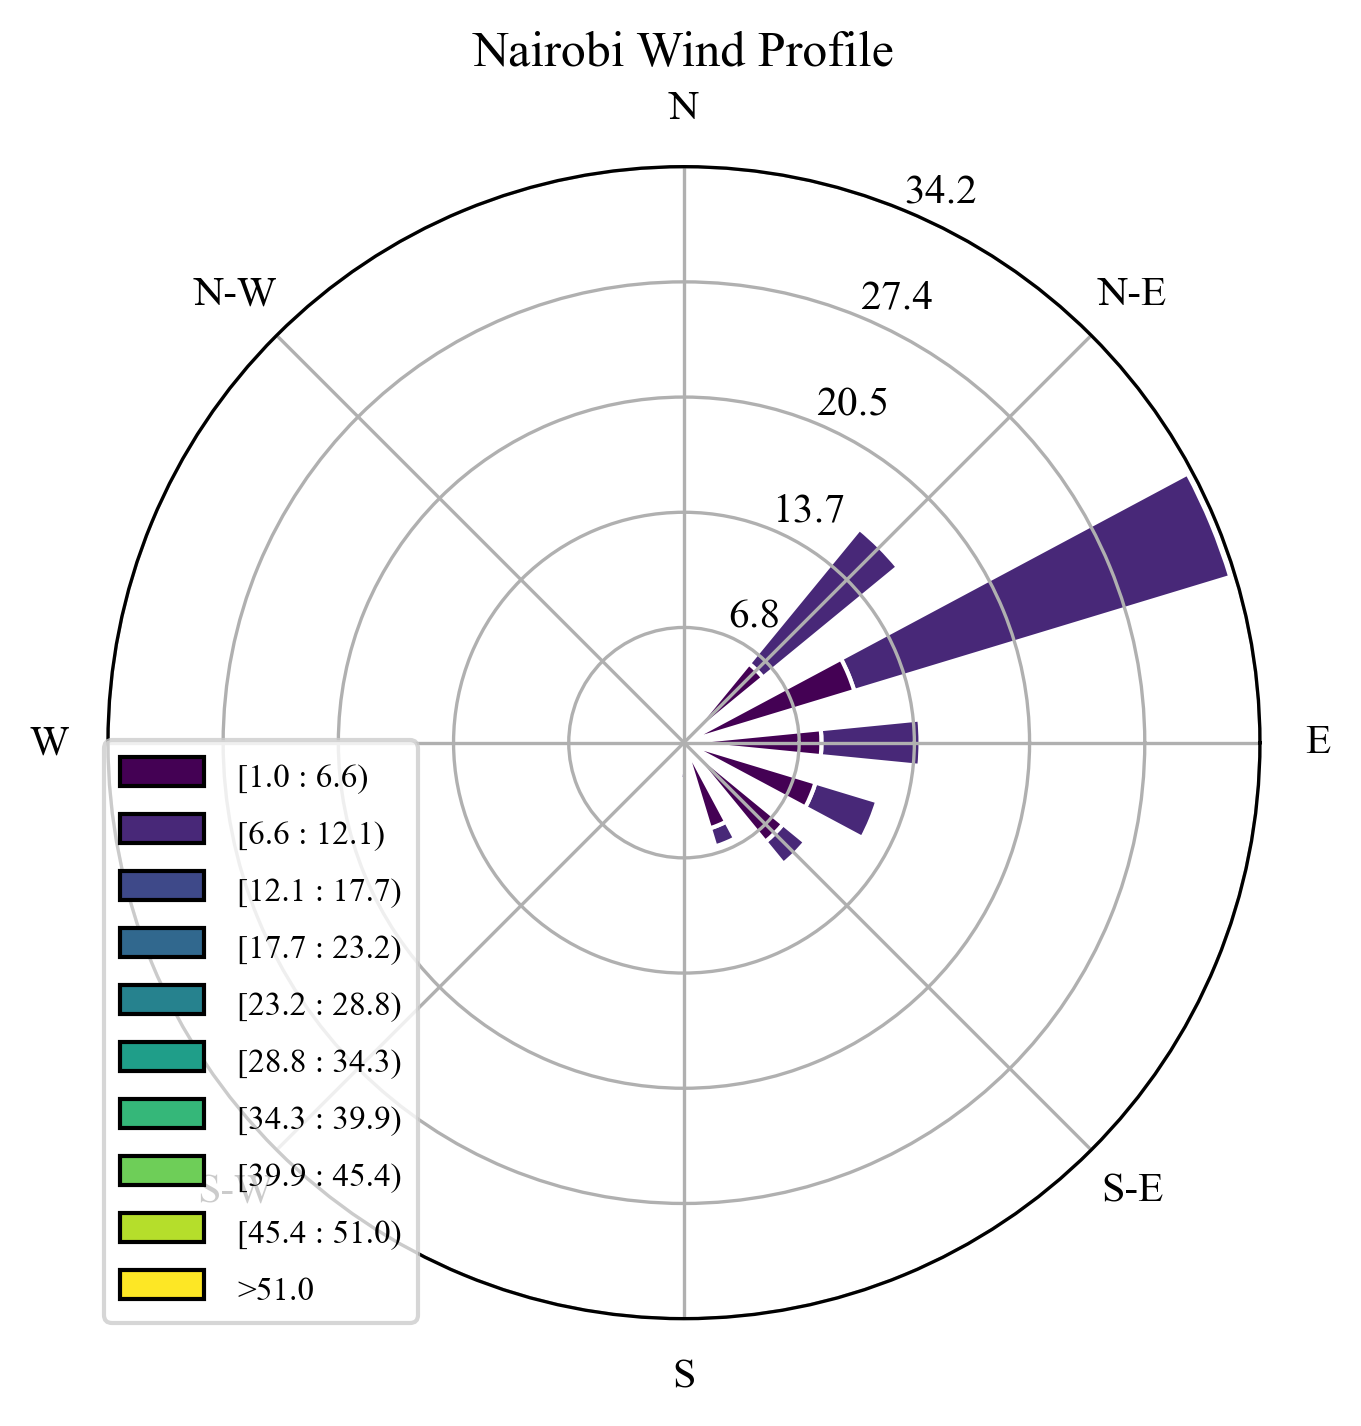

In [23]:
fig = plt.figure()
ax = windrose.WindroseAxes.from_ax(fig=fig)
ax.bar(weather_data['wind_direction'], weather_data['wind_speed'], 
       normed=True, bins = 10,
       opening=0.5, edgecolor='white')
ax.set_legend()
plt.title('Nairobi Wind Profile')
plt.show()

In [24]:
weather_data['wind_speed'].describe()

count    3652.000000
mean        6.712760
std         3.155501
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        51.000000
Name: wind_speed, dtype: float64

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
Nairobi Winds originate from six different zones, with a steady decrease in wind velocity in the cooler months with a gust reaching up to 7.3m/s and are prevailing Easterly
</div>

<a id="8"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">8. Atmospheric Pressure Analysis</p>

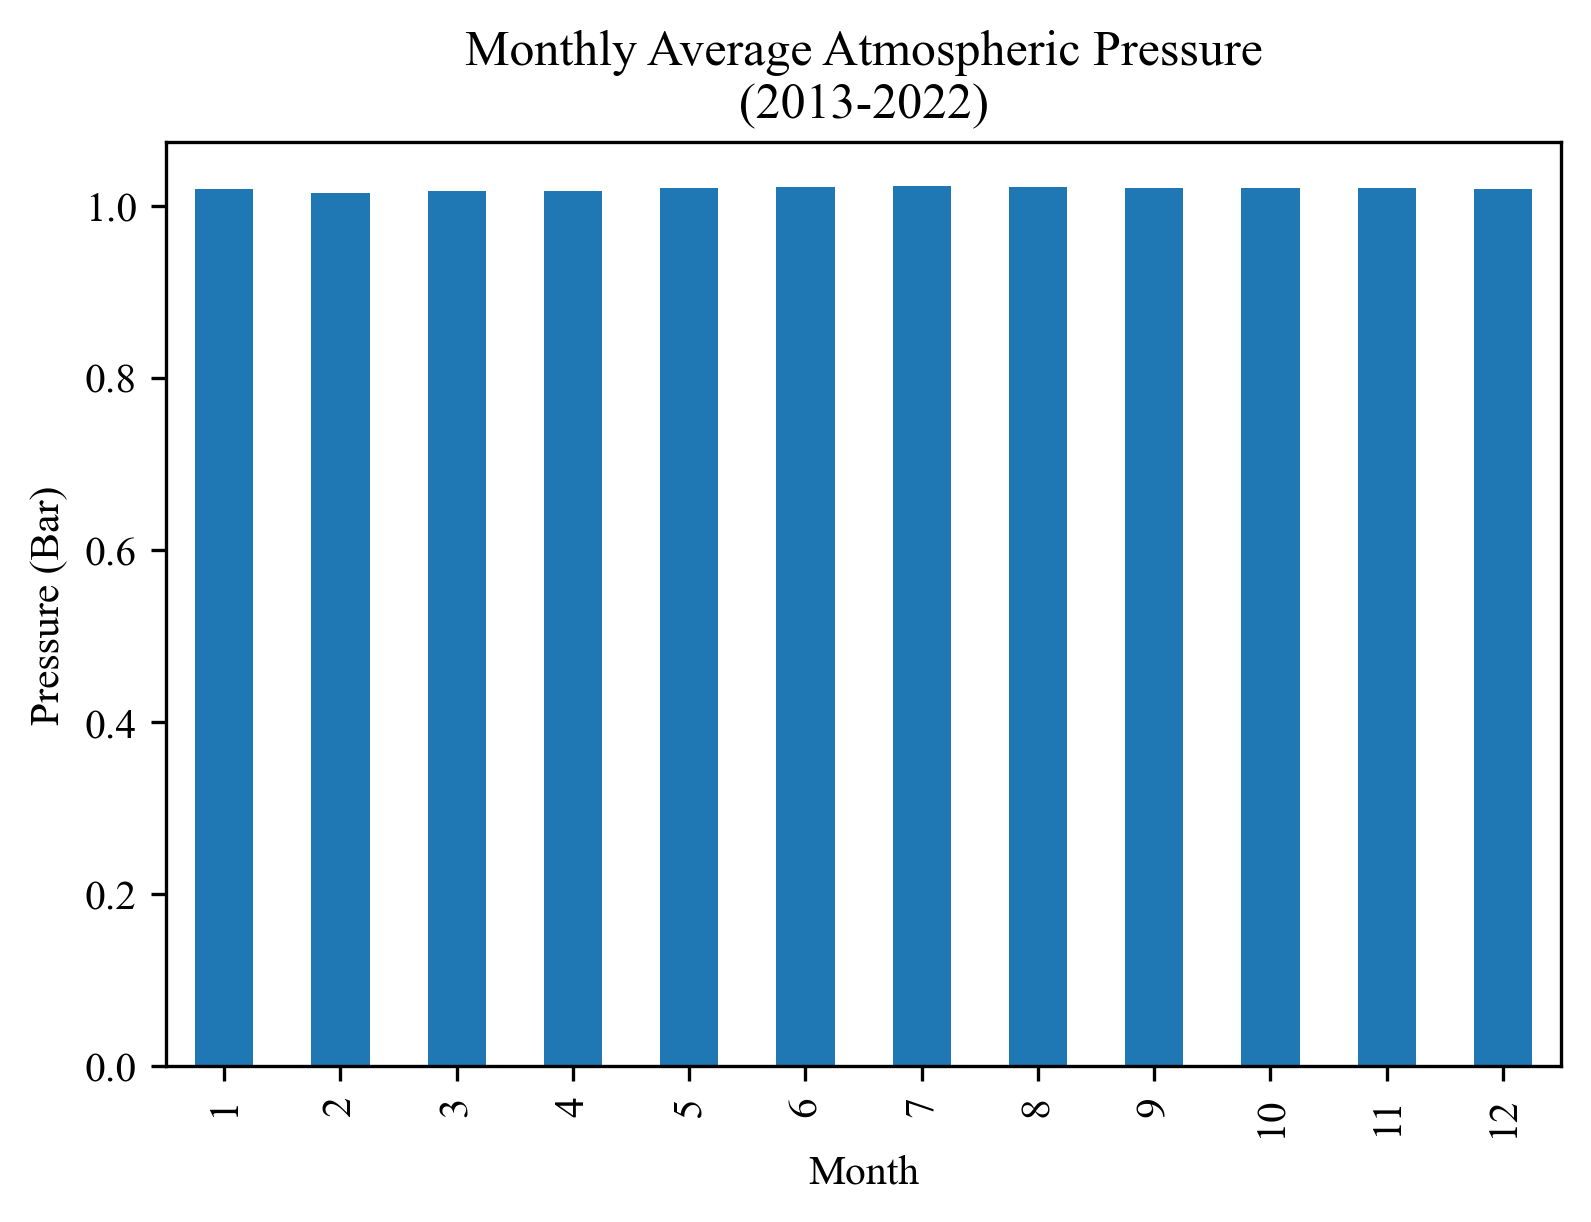

In [25]:
weather_data.groupby(weather_data.index.month)['pressure'].mean()\
.plot(kind = 'bar',
     title = 'Monthly Average Atmospheric Pressure\n(2013-2022)',
     ylabel = 'Pressure (Bar)',
     xlabel = 'Month',
     figsize = (6,4))
plt.show()

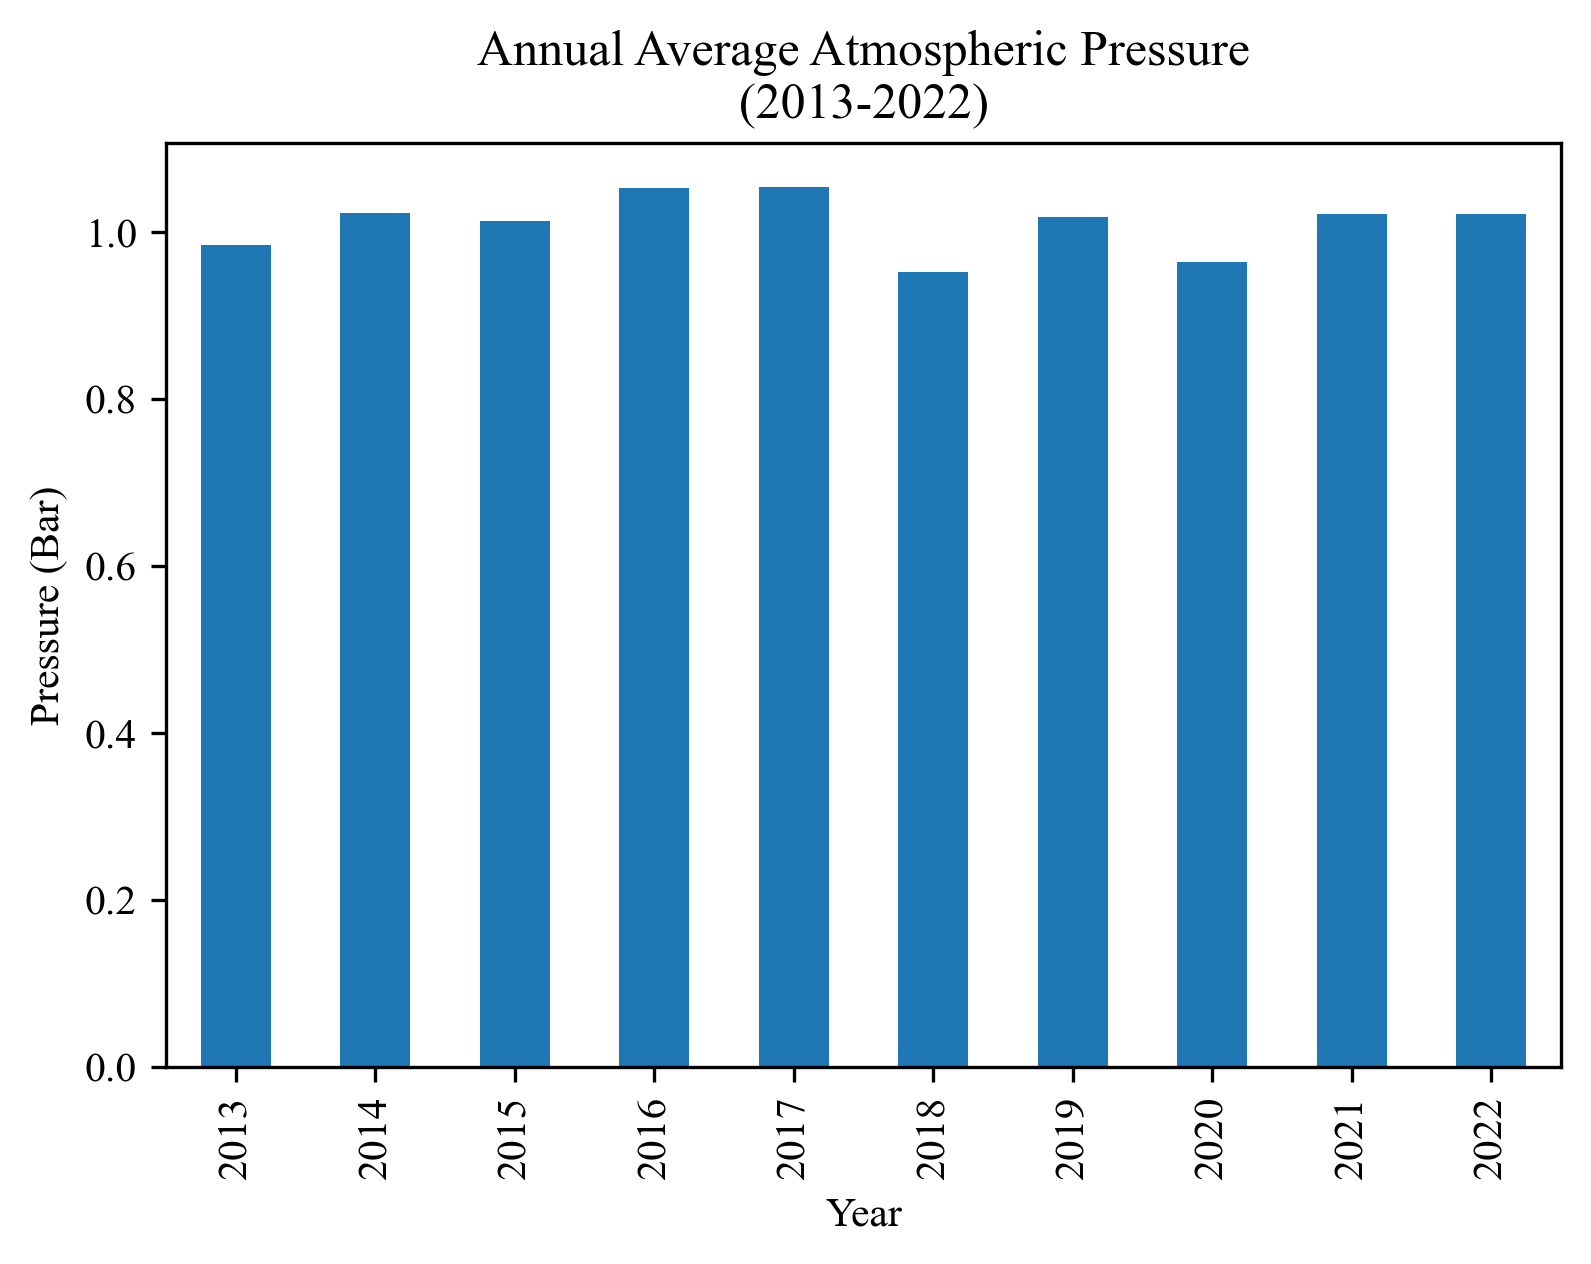

In [26]:
weather_data.groupby(weather_data.index.year)['pressure'].mean()\
.plot(kind = 'bar',
     title = 'Annual Average Atmospheric Pressure\n(2013-2022)',
     ylabel = 'Pressure (Bar)',
     xlabel = 'Year',
     figsize = (6,4))
plt.show()

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
The atmospheric pressure fluctuates over the years due to temperature and rainfall patterns. There is a significant decrease in the year 2018 (which happens to be the coldest year). It is also important to note that the monthly averages of atmospheric pressure is uniform.
</div>

<a id="9"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">9. Humidity Analysis</p>

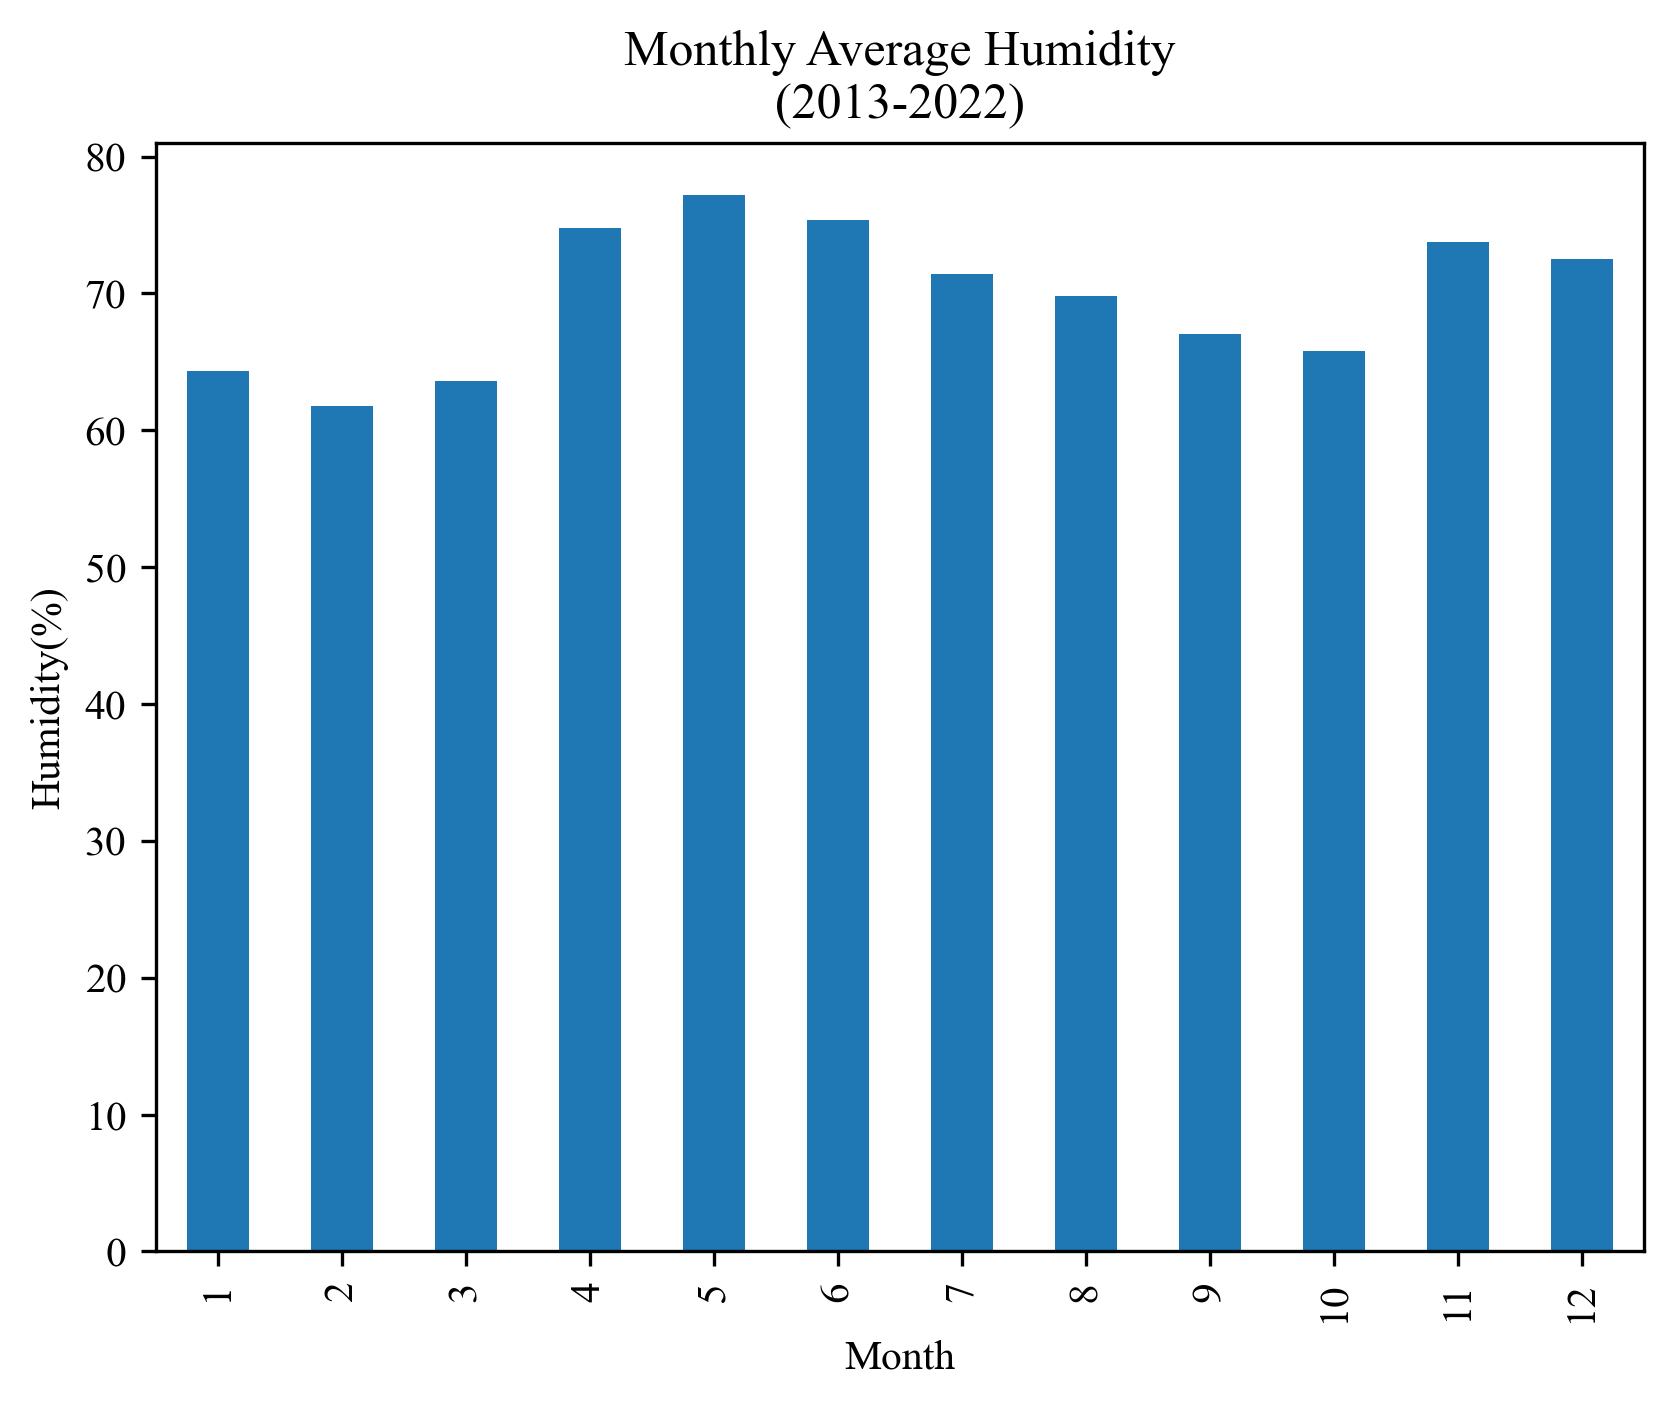

In [41]:
weather_data.groupby(weather_data.index.month)['humidity'].mean()\
.plot(kind = 'bar',
     title = 'Monthly Average Humidity\n(2013-2022)',
     ylabel = 'Humidity(%)',
     xlabel = 'Month')
plt.show()

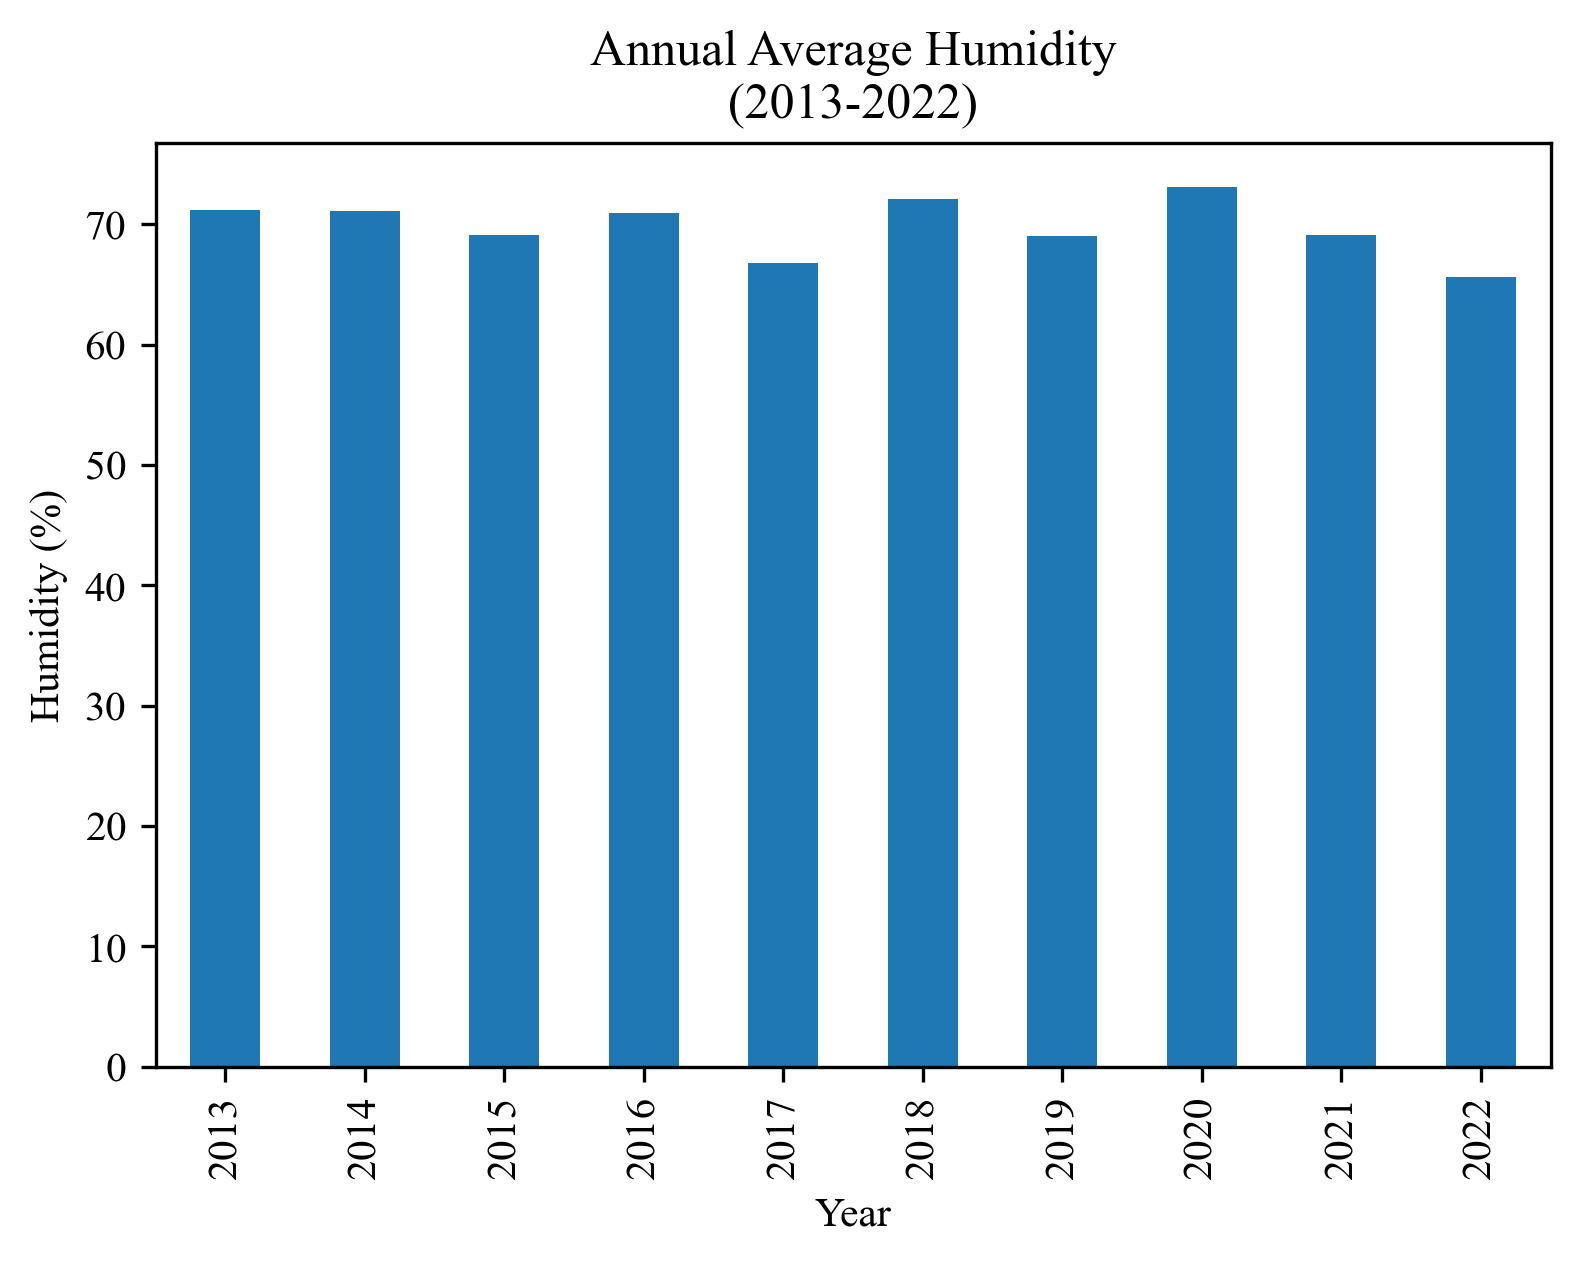

In [28]:
weather_data.groupby(weather_data.index.year)['humidity'].mean()\
.plot(kind = 'bar',
     title = 'Annual Average Humidity\n(2013-2022)',
     ylabel = 'Humidity (%)',
     xlabel = 'Year',
     figsize = (6,4))
plt.savefig('annual_humidity.png')
plt.show()

In [29]:
weather_data['humidity'].describe()

count    3652.000000
mean       69.808790
std         9.646174
min        39.700000
25%        63.200000
50%        70.300000
75%        76.800000
max        96.400000
Name: humidity, dtype: float64

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
Nairobi humidity ranges from 63% - 76% with occassional spikes of up to 96% during the wet season. Generally the humidity is stable with minor fluctuations during the rainy seasons.
</div>

<a id="10"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">10. Solar Energy Analysis</p>

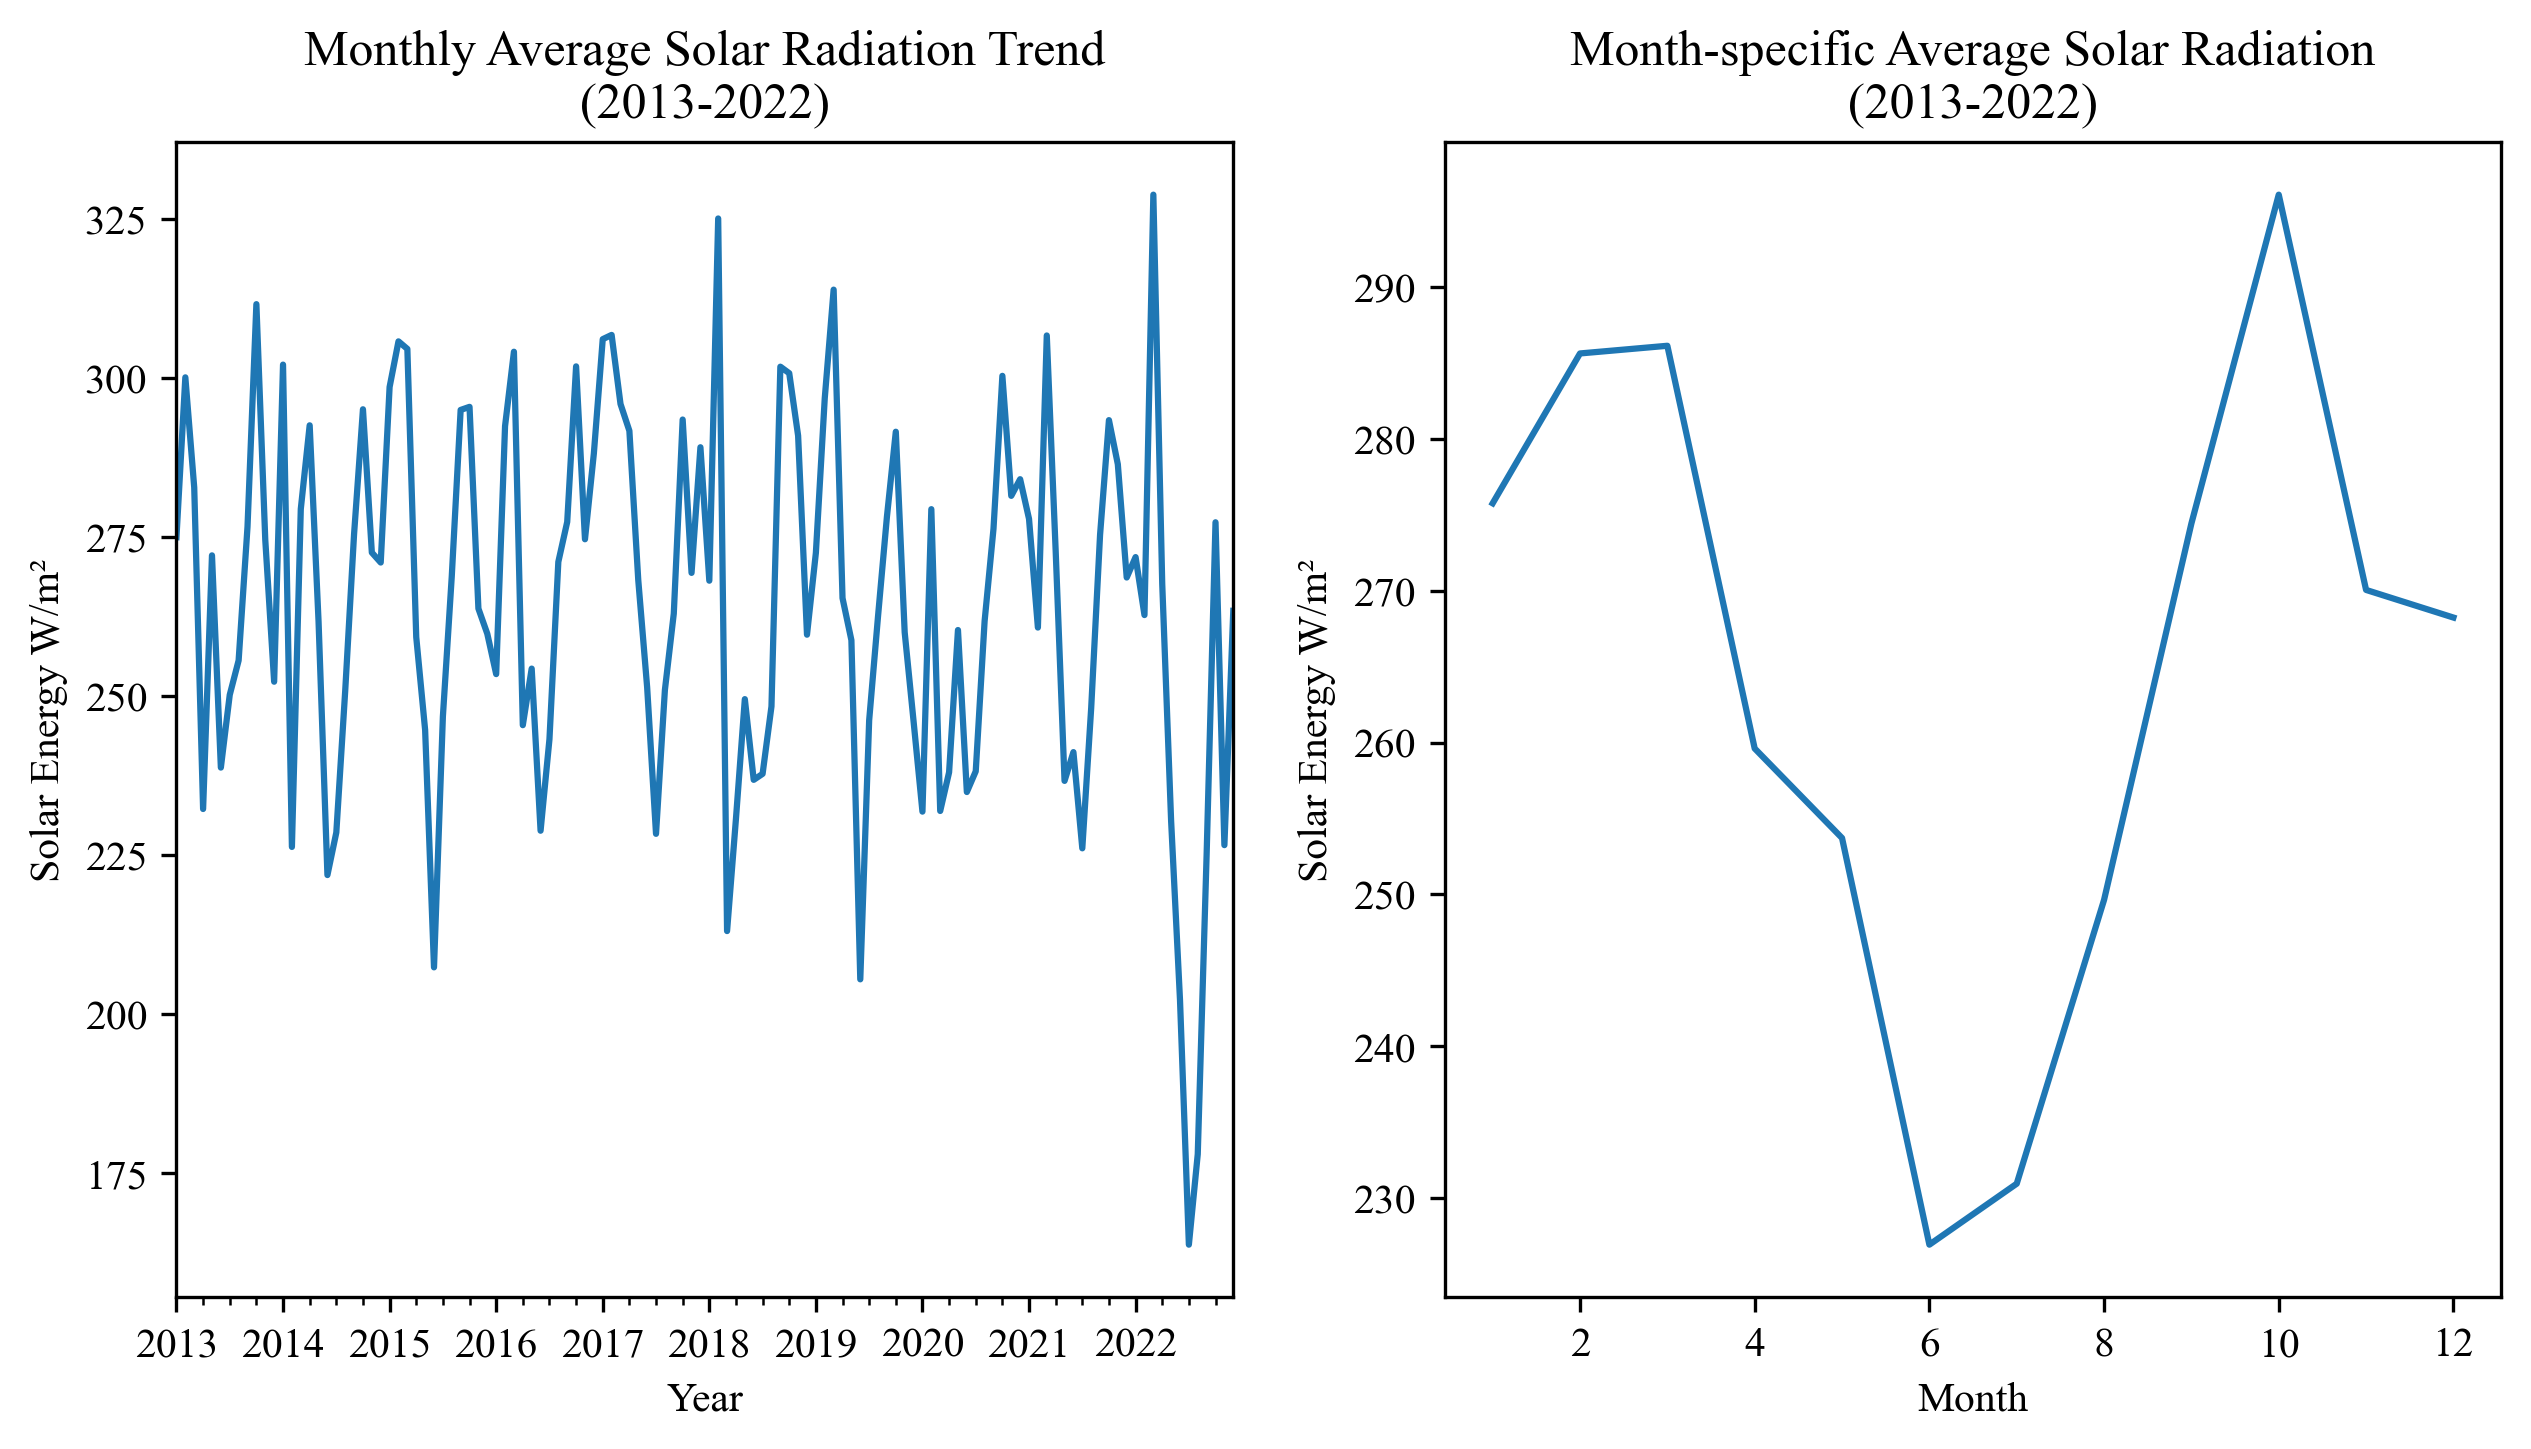

In [42]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
## plot monthly average temperature trend for theperiod
weather_data['solar_radiation'].resample('M').mean()\
.plot(
     ax = axes[0],
     kind = 'line',
     title = 'Monthly Average Solar Radiation Trend\n(2013-2022)',
     ylabel = 'Solar Energy W/m\u00B2',
     xlabel = 'Year')
## plot month specific average temperature
weather_data.groupby(weather_data.index.month)['solar_radiation'].mean()\
.plot(
     ax = axes[1],
     kind = 'line',
     title = 'Month-specific Average Solar Radiation\n(2013-2022)',
     ylabel = 'Solar Energy W/m\u00B2',
     xlabel = 'Month')
plt.savefig('solar_radiation.png')
plt.show()

In [31]:
weather_data['solar_radiation'].describe()

count    3652.000000
mean      264.677930
std        52.464841
min        57.400000
25%       233.000000
50%       272.300000
75%       305.700000
max       384.600000
Name: solar_radiation, dtype: float64

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
There's a uniform trend in the amount of solar energy produced in the past decade; ranging from 233 Watts per sq.meter to 305Watts per sq.meter. There is a consistent pattern of higher solar radiation during the hotter months compared to the cooler months. 
</div>

<a id="11"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">11. Weather Condition Analysis</p>

partly-cloudy-day    2403
rain                 1151
cloudy                 55
wind                   27
clear-day              15
snow                    1
Name: condition, dtype: int64


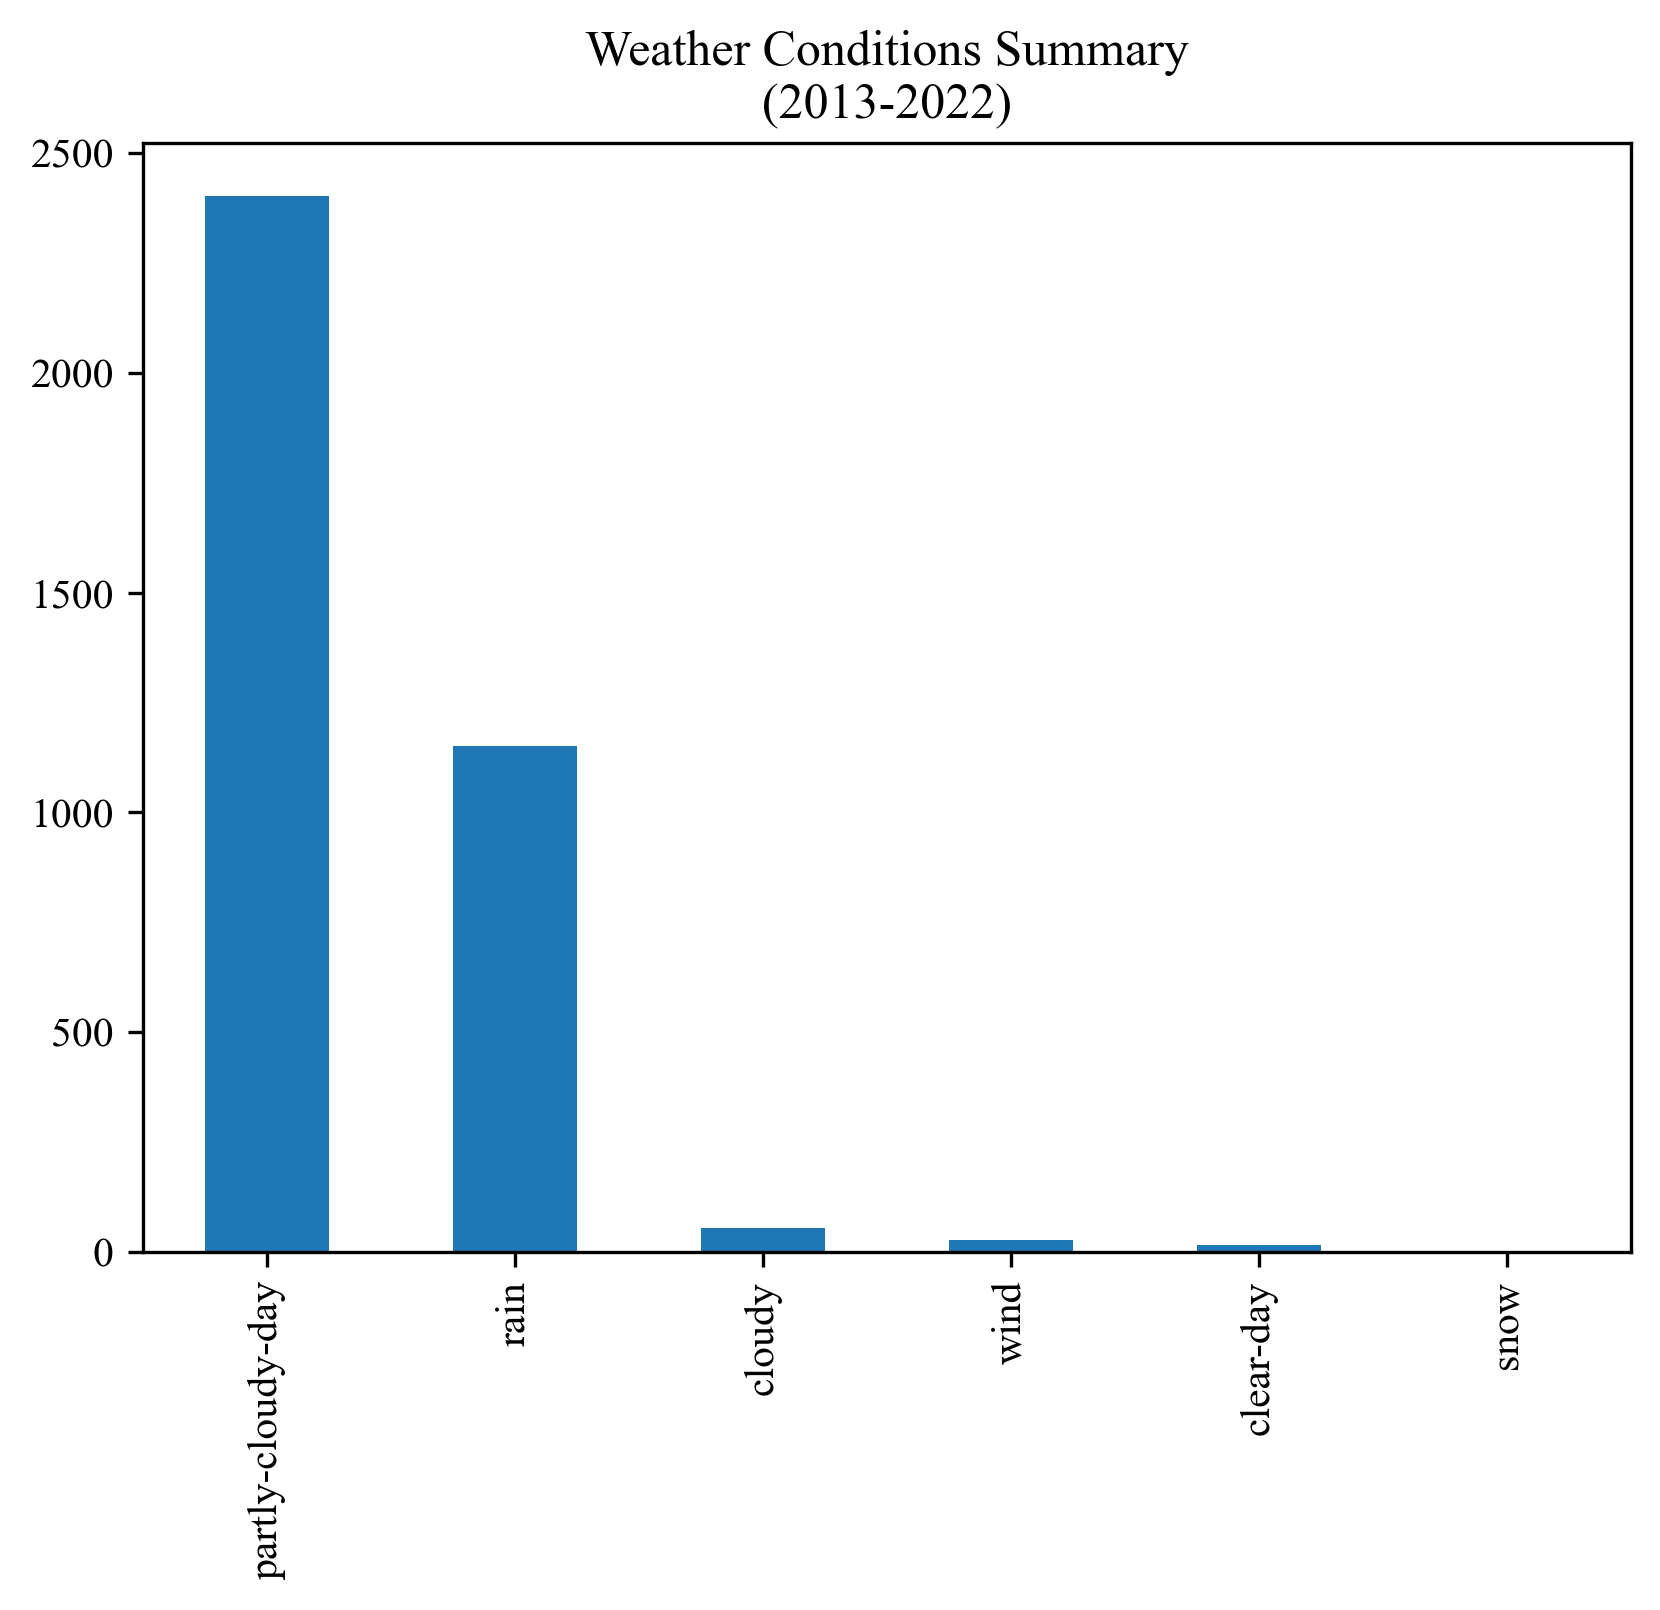

,pressure,cloud_cover,humidity,rainfall,temperature,wind_direction,wind_speed,wind_gust,condition,solar_radiation,uvindex
date,,,,,,,,,,,
2018-05-23,NaN,88.3,83.6,2,18,125.1,6,NaN,snow,277.3,9


In [32]:
print(weather_data['condition'].value_counts())
weather_data['condition'].value_counts().plot.bar()
plt.title('Weather Conditions Summary\n(2013-2022)')
plt.show()
weather_data.query('condition == "snow"')

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
There was a total of 1151 rainy days in the past decade with an anomalous snow recorded on May 23, 2018. 
</div>

<a id="12"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">12. Cloud Cover Analysis</p>

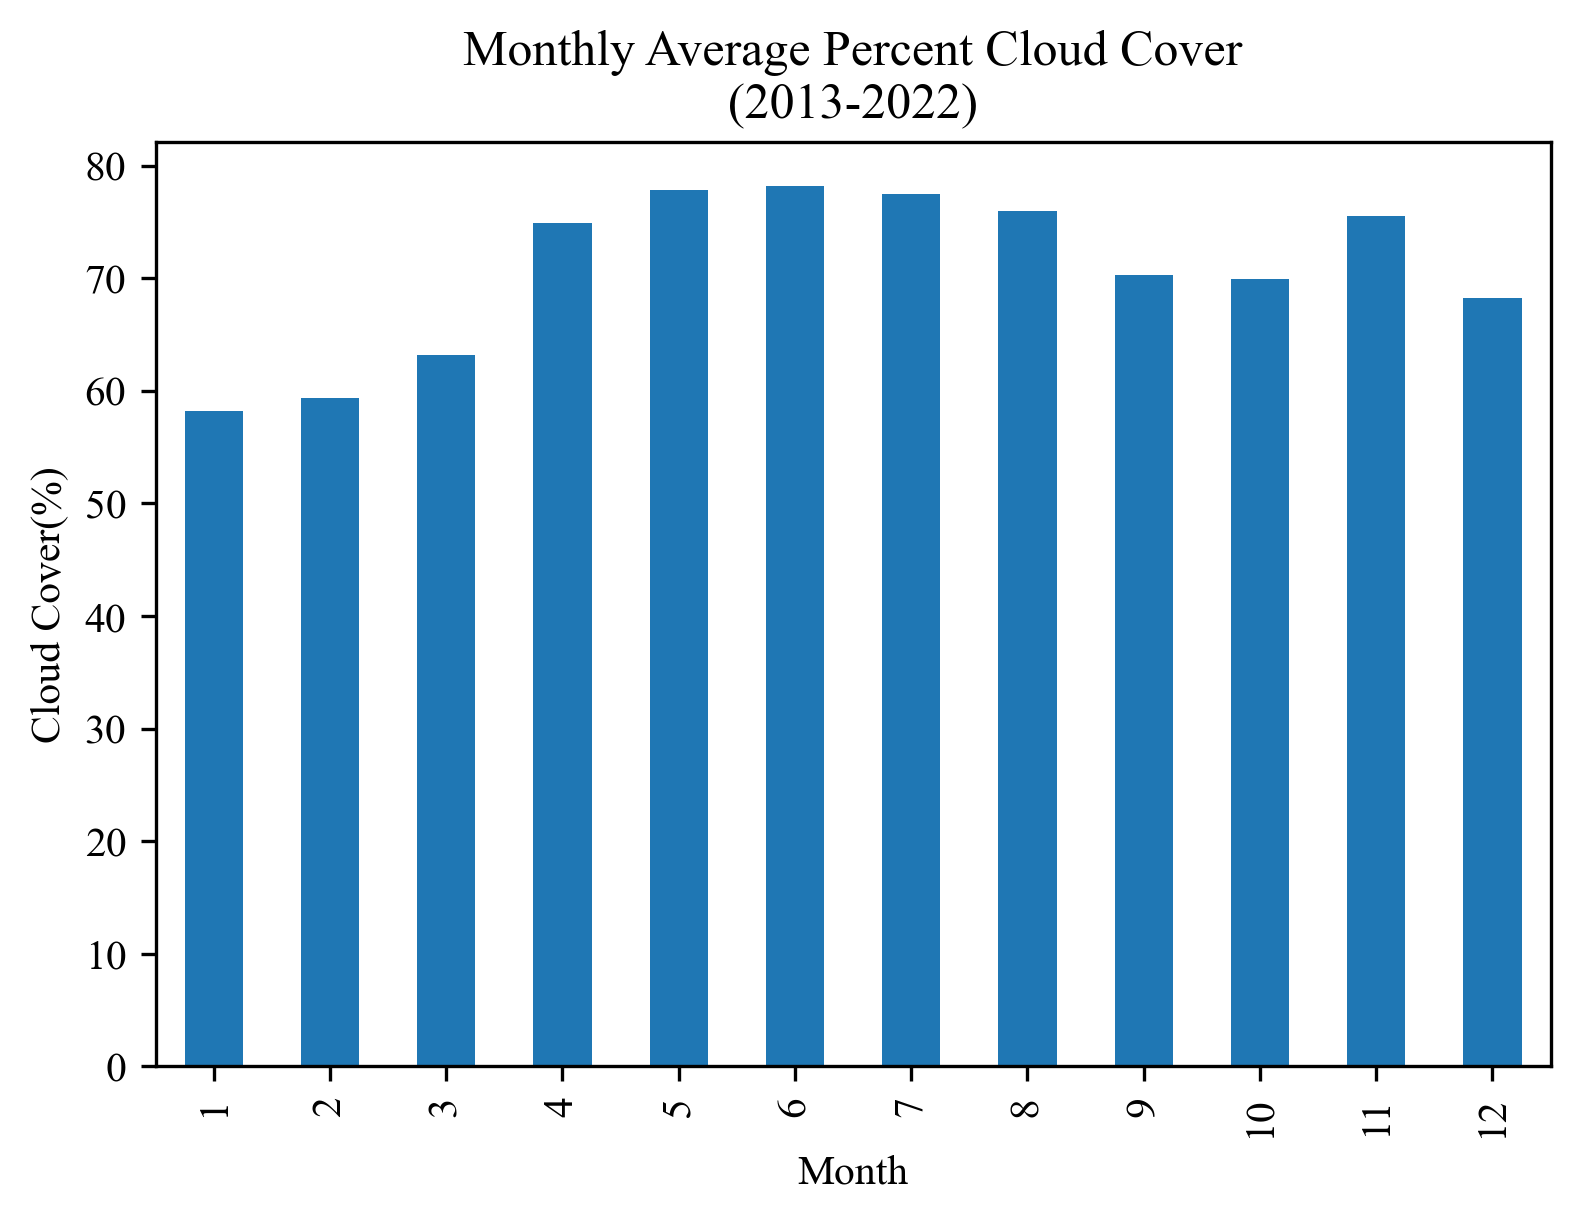

count    3652.000000
mean       70.794031
std        15.669258
min         4.100000
25%        62.200000
50%        74.300000
75%        82.800000
max        97.000000
Name: cloud_cover, dtype: float64

In [33]:
weather_data.groupby(weather_data.index.month)['cloud_cover'].mean()\
.plot(kind = 'bar',
     title = 'Monthly Average Percent Cloud Cover\n(2013-2022)',
     ylabel = 'Cloud Cover(%)',
     xlabel = 'Month',
     figsize = (6,4))
plt.show()

weather_data['cloud_cover'].describe()

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
Cloud cover in the city ranges from 62% - 82% with occassional spike to 97% and 4% on the low. The long rain months and the cold months record the highest cloud cover percentage in a day. 
</div>

<a id="13"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">13. UV Index Analysis</p>

In [34]:
pd.cut(weather_data['uvindex'],3,labels=['high','low','medium']).value_counts()

medium    3164
low        377
high       111
Name: uvindex, dtype: int64

count    3652.000000
mean        9.002738
std         1.356075
min         3.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: uvindex, dtype: float64

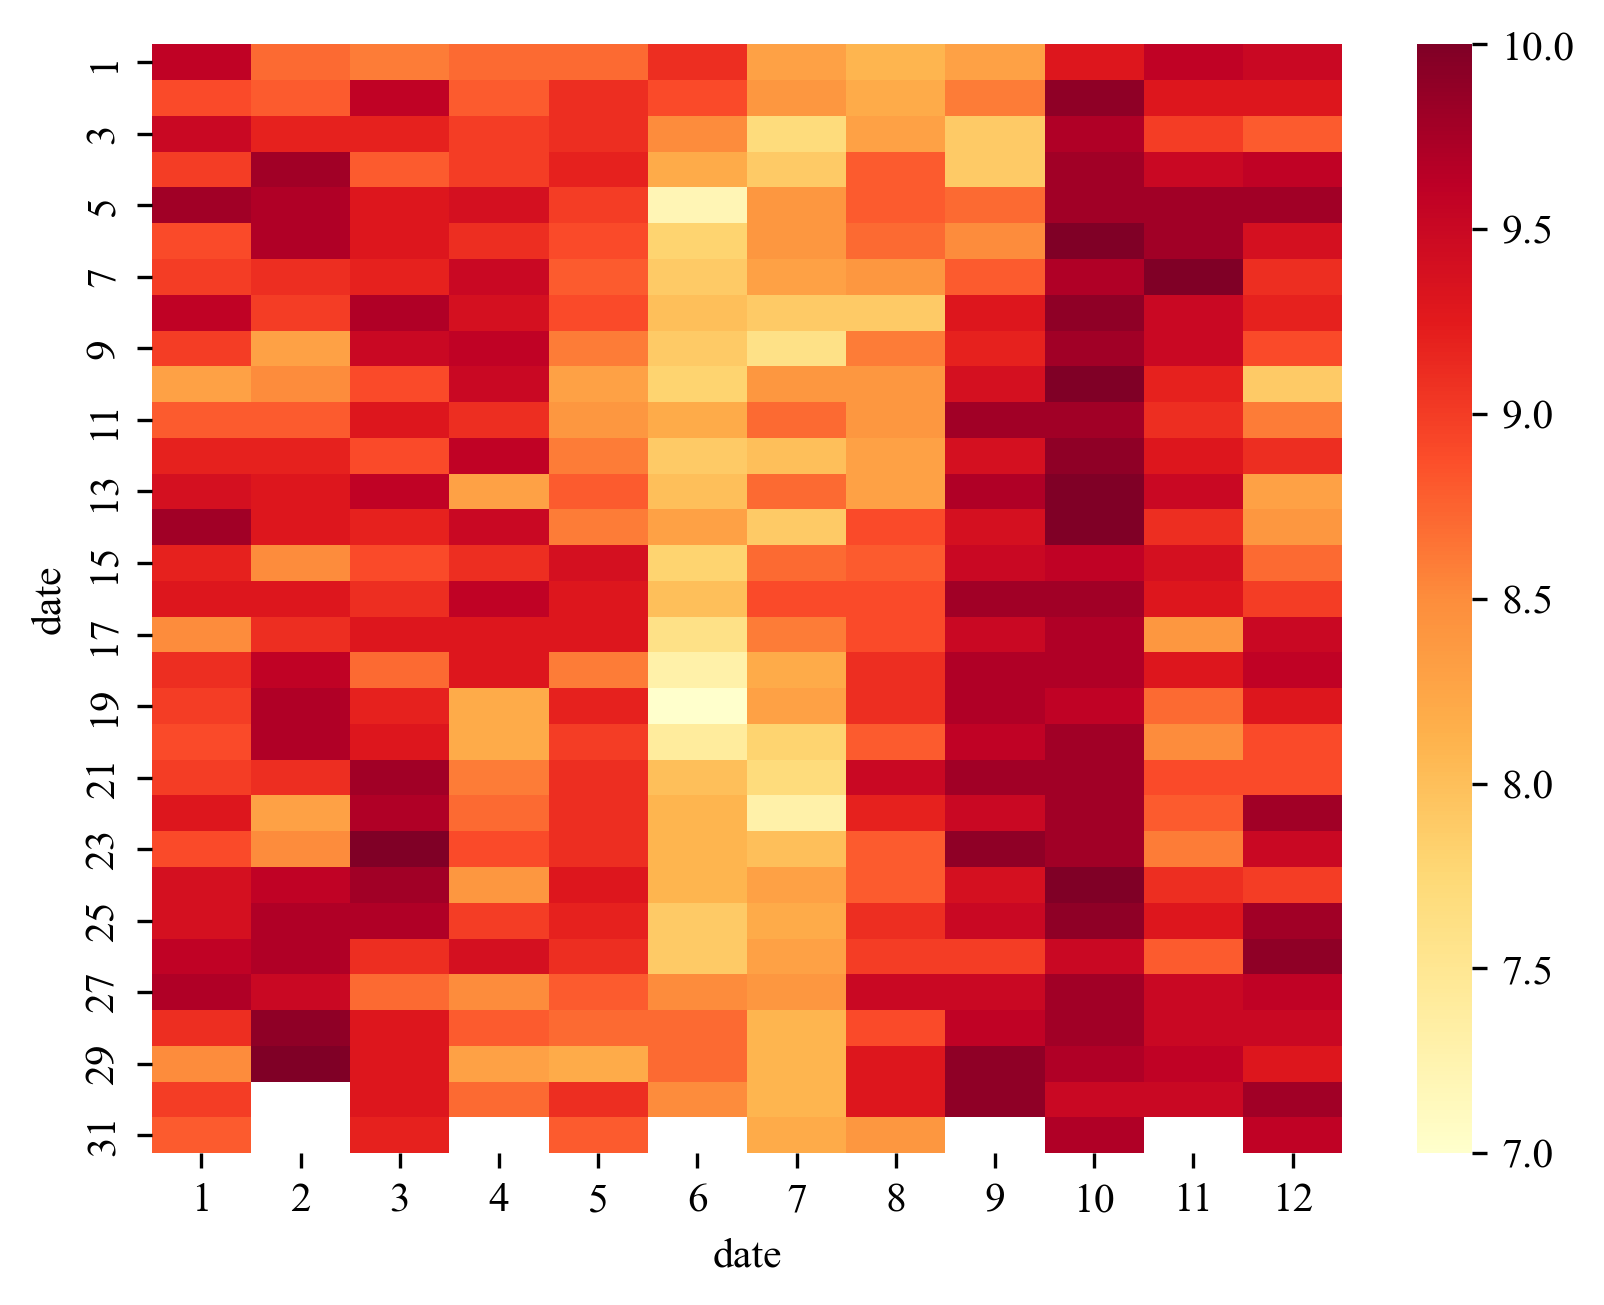

In [35]:
uv_data = pd.pivot_table(weather_data, values = 'uvindex',index = weather_data.index.day,columns = weather_data.index.month)
sns.heatmap(uv_data,cmap='YlOrRd')
weather_data['uvindex'].describe()

<div style="
            border-radius: 10px;
            border-width: 5px;
            color:#000000;
            font-size:20px;
            font-family: Tan Mon Cheri;
            text-align:center;
            letter-spacing:0.5px;
            padding: 0.7em;
            text-align:left">
UV intensity is high in the hotter months with the month of October recordiing the highest amount of 9.5-10
</div>

<a id="14"></a>
## <p style="font-family:roboto;color:#0a0a0b;font-size:150%;text-align:center;border-radius:60px 40px;">14. Correlation Plot</p>

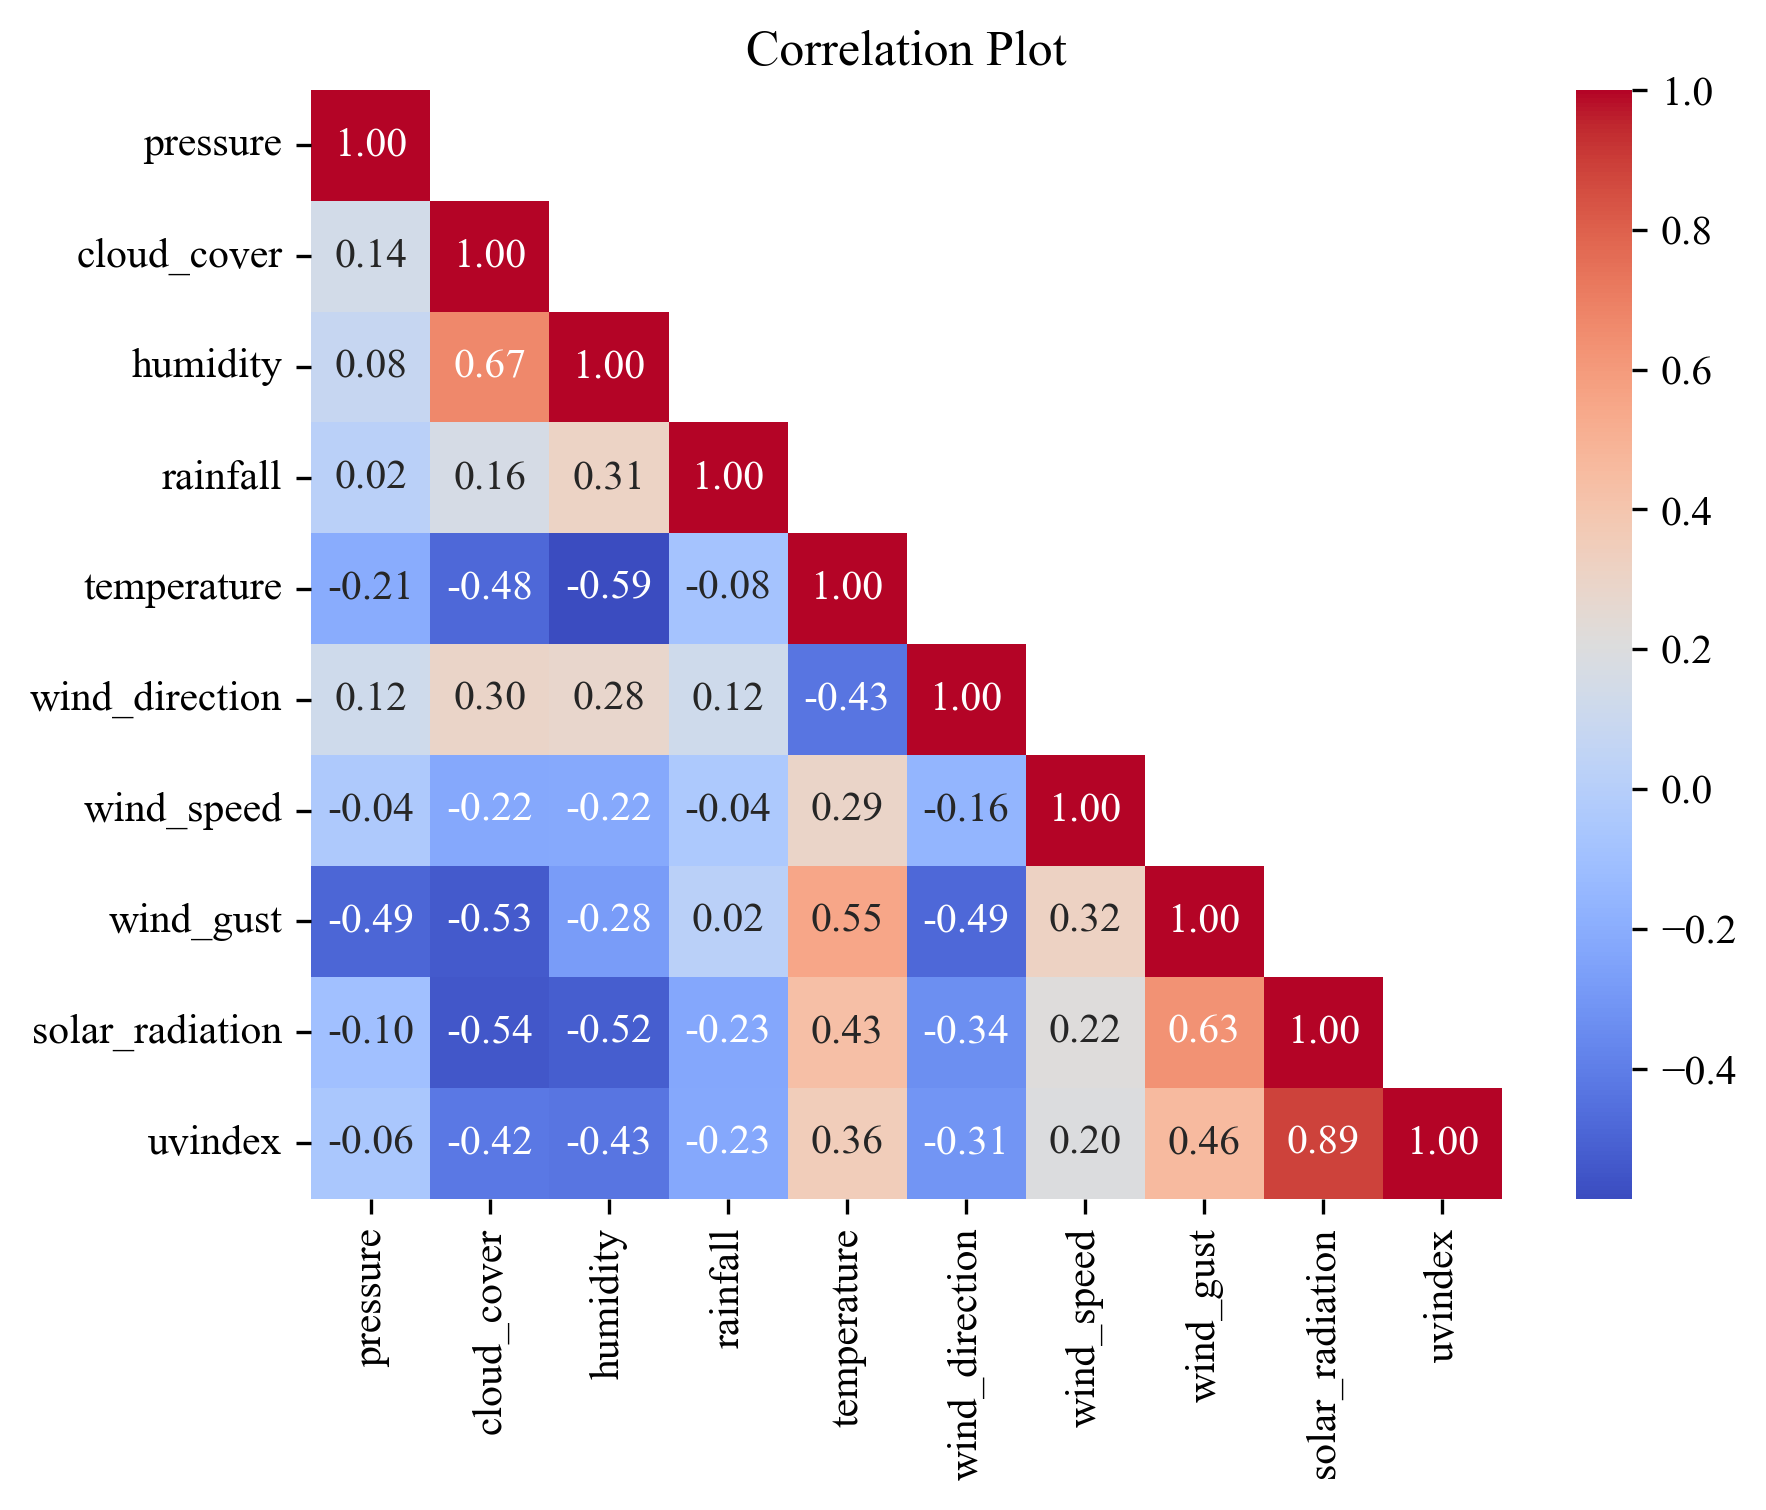

In [36]:
corr = weather_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f',mask=mask)
plt.title('Correlation Plot')
plt.show()